In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2
import preprocessing
import models

In [2]:

# Example usage:
param_grid_rf = {
    'n_estimators': [100, 500, 1000, 5000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [68]:
CNA_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica_Model code & inputs/CNA_no_trim_low_1Mb_irf.tsv'
Ratio_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica_Model code & inputs/ratios_150_ratio.centered_irf.tsv'
EndMotif_file = '/Users/irf3irf3/Desktop/offline_workspace/ResearchCode2_in_transition/Tissue_of_origin/EndMotif_frequency.txt'
Output_dir = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/ML_output'

CNA = pd.read_csv(CNA_file, sep='\t', index_col=[0,1,2])
Ratio = pd.read_csv(Ratio_file, sep='\t', index_col=[0,1,2])
EndMotif = pd.read_csv(EndMotif_file, sep='\t', index_col=0)





display(CNA.head())
display(Ratio.head())
display(EndMotif.head())

58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     0.015625     0.374554     2.153216   
     5000001  6000000   ...     1.199363     0.681652     2.152142   
     7000001  8000000   ...     4.955670     1.415199     2.571430   
     14000001 15000000  ...     0.015625     0.449969     1.554665   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      0.015625     0.015625     0.015625     0.015625   
     5000001  6000000      0.258161     0.015625     1.050342     0.015625   
     7000001  8000000      2.628545     2.723716     2.605381     4.064862   
     14000001 15000000     0.015625     0.251518     2.169661     0.246217   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 3000001  4000000           NaN          NaN           NaN  
     4000001  5000000      1.067131     0.015625      0.015625  
     5000001  6000000      0.892972     0.015625      0.019046  
     7000001  8000000      3.416386     2.808183      1.777171  
     14000001 15000000     0.360449     4.636063      2.102079  

[5 rows x 243 columns]

58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.562842e-07   

                        BC005_UC1  ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...     0.019924    -0.025483     0.037087   
     10000000 15000000   0.033062  ...     0.014763    -0.009470     0.025152   
     15000000 20000000   0.006861  ...     0.006242    -0.033472     0.021073   
     20000000 25000000   0.037555  ...     0.015166    -0.022688     0.030645   
     25000000 30000000   0.028230  ...     0.018853    -0.015850     0.025356   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 5000000  10000000    -0.020098    -0.003235     0.014730     0.046827   
     10000000 15000000    -0.027964    -0.008776     0.009590     0.036753   
     15000000 20000000    -0.034212    -0.015775     0.009115     0.036248   
     20000000 25000000    -0.019502    -0.008385     0.011670     0.040518   
     25000000 30000000    -0.009840    -0.009665     0.010743     0.042024   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 5000000  10000000     0.037673     0.094724      0.021397  
     10000000 15000000     0.032190     0.073988     -0.000120  
     15000000 20000000     0.028780     0.097517      0.001499  
     20000000 25000000     0.027899     0.096164      0.014928  
     25000000 30000000     0.030353     0.093724      0.017164  

[5 rows x 242 columns]

,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,PB206_UC1_sorted_motifs.txt,PB-280_UC1_sorted_motifs.txt,PB-276_UC1_sorted_motifs.txt,PB-305_UC1_sorted_motifs.txt,NU75_sorted_motifs.txt,...,WBC1222_UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1697863,2047129,2053065,1694213,1874416,1873724,1921580,1652556,1798992,2792628,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,558742,655722,645064,545181,612951,597739,606259,544355,597292,887600,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,718290,842404,823364,722142,799007,789866,792731,692573,752361,1144903,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,1002696,1147014,1098857,917790,1075842,1064783,1089432,962189,978963,1546633,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,640921,759313,711681,622732,684254,677695,671315,626294,682286,1000480,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [4]:
EndMotif.columns = EndMotif.columns.str.replace('_sorted_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('.dup_mk_motifs.txt', '')
display(EndMotif.head())

,PB-278_UC1,PB046_UC1,NU90,RCC013_UC1,NU71,PB206_UC1,PB-280_UC1,PB-276_UC1,PB-305_UC1,NU75,...,WBC1222_UC1,BC020_UC1,WBC1196_UC1,WBC1111_UC1,WBC1188_UC1,BC016_UC1,WBC1309_UC1,WBC1304_UC1,WBC1322_UC1,BC011_UC1
AAAA,1697863,2047129,2053065,1694213,1874416,1873724,1921580,1652556,1798992,2792628,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,558742,655722,645064,545181,612951,597739,606259,544355,597292,887600,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,718290,842404,823364,722142,799007,789866,792731,692573,752361,1144903,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,1002696,1147014,1098857,917790,1075842,1064783,1089432,962189,978963,1546633,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,640921,759313,711681,622732,684254,677695,671315,626294,682286,1000480,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [5]:
# Step 1: Find common columns
common_columns = set(EndMotif.columns) & set(CNA.columns) & set(Ratio.columns)
common_columns_list = list(common_columns)  # Convert to list

# Step 2: Find non-common columns
non_common_endmotif = set(EndMotif.columns) - common_columns
non_common_cna = set(CNA.columns) - common_columns
non_common_ratio = set(Ratio.columns) - common_columns

# Print non-common columns
print("Non-common columns in EndMotif:", non_common_endmotif)
print("Non-common columns in CNA:", non_common_cna)
print("Non-common columns in Ratio:", non_common_ratio)

# Step 3: Filter DataFrames to keep only common columns
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

Non-common columns in EndMotif: {'WBC1291_UC1'}
Non-common columns in CNA: {'WBC1320_UC5', 'WBC1325_UC4', 'WBC1317_UC3', 'NU19_UC1', 'NU71_UC1', 'WBC1317_UC2', 'WBC1320_UC3', 'WBC1322_UC3', 'NU36_UC1', 'WBC1116_UC1', 'NU3_UC1', 'WBC1202_UC1', 'WBC1291_UC1', 'WBC1324_UC3', 'NU18_UC1', 'WBC1317_UC4', 'WBC1198_UC1', 'WBC1050_UC2', 'WBC1045_UC3', 'NU16_UC1', 'WBC1050_UC3', 'WBC1324_UC2', 'NU70_UC1', 'WBC1320_UC2', 'NU19R_UC1', 'NU75_UC1', 'WBC1207_UC1', 'NU68_UC1', 'NU1_UC1', 'WBC1322_UC5', 'WBC1045_UC2', 'WBC1325_UC3', 'NU33_UC1', 'WBC1320_UC4', 'WBC1325_UC5b', 'WBC1322_UC2', 'NU32_UC1', 'WBC1322_UC4', 'WBC1324_UC5', 'WBC1325_UC2', 'WBC1324_UC4', 'WBC1135_UC1', 'WBC1325_UC5'}
Non-common columns in Ratio: {'WBC1320_UC5', 'WBC1325_UC4', 'WBC1317_UC3', 'NU19_UC1', 'NU71_UC1', 'WBC1317_UC2', 'WBC1320_UC3', 'WBC1322_UC3', 'NU36_UC1', 'WBC1116_UC1', 'NU3_UC1', 'WBC1202_UC1', 'WBC1324_UC3', 'NU18_UC1', 'WBC1317_UC4', 'WBC1198_UC1', 'WBC1050_UC2', 'WBC1045_UC3', 'NU16_UC1', 'WBC1050_UC3', 'WBC132

PB-284_UC1  PB-377_UC1       NU3  WBC1243_UC1  \
chr  start    end                                                       
chr1 3000001  4000000          NaN         NaN       NaN          NaN   
     4000001  5000000     0.015625    0.393538  0.015625     0.015625   
     5000001  6000000     0.015625    2.177534  0.015625     0.015625   
     7000001  8000000     3.500723    5.608684  3.303140          inf   
     14000001 15000000    0.395712    2.387847  1.306753     0.015625   

                        RCC009_UC1  WBC1174_UC1  BC020_UC1  WBC1320_UC1b  \
chr  start    end                                                          
chr1 3000001  4000000          NaN          NaN        NaN           NaN   
     4000001  5000000     0.015625     0.015625   0.015625      0.015625   
     5000001  6000000     0.015625     0.331178   0.935094      0.015625   
     7000001  8000000     0.724479     1.510947   5.677178           inf   
     14000001 15000000    2.347987     0.958506   0.015625      0.015625   

                        WBC1206_UC1  WBC1265_UC1  ...        81  WBC1324_UC1  \
chr  start    end                                 ...                          
chr1 3000001  4000000           NaN          NaN  ...       NaN          NaN   
     4000001  5000000      3.081321     1.866272  ...  0.015625     0.015625   
     5000001  6000000      3.148526     2.153510  ...  0.015625     1.199363   
     7000001  8000000      4.360196     2.639690  ...  0.869690     4.955670   
     14000001 15000000     1.790228     1.980917  ...  0.015625     0.015625   

                        RCC009_UC2  WBC1320_UC1  WBC1300_UC1  RCC017_UC1  \
chr  start    end                                                          
chr1 3000001  4000000          NaN          NaN          NaN         NaN   
     4000001  5000000     0.015625          inf     8.540887    0.185159   
     5000001  6000000     0.015625          inf     9.716028    1.236647   
     7000001  8000000     2.231583          inf     9.582101    6.456203   
     14000001 15000000    1.865868     0.015625     5.592110    0.015625   

                        RCC012_UC2        73  PB206_UC1  WBC1058_UC1  
chr  start    end                                                     
chr1 3000001  4000000          NaN       NaN        NaN          NaN  
     4000001  5000000     0.015625  2.151004   0.015625     0.438729  
     5000001  6000000     0.015625  1.091101   0.015625     0.617478  
     7000001  8000000     2.809768  2.421009   3.747348     1.316052  
     14000001 15000000    0.050193  2.455380   2.292772     0.015625  

[5 rows x 200 columns]

(312, 200)


PB-284_UC1  PB-377_UC1       NU3  WBC1243_UC1  \
chr  start    end                                                       
chr1 5000000  10000000    0.003896    0.044674 -0.011802     0.056008   
     10000000 15000000    0.002636    0.023791 -0.011381     0.043768   
     15000000 20000000   -0.006939    0.005747 -0.020040     0.046424   
     20000000 25000000    0.005099    0.040397 -0.013185     0.047568   
     25000000 30000000    0.000804    0.026598 -0.013654     0.051620   

                        RCC009_UC1  WBC1174_UC1  BC020_UC1  WBC1320_UC1b  \
chr  start    end                                                          
chr1 5000000  10000000    0.013576    -0.003520   0.102848      0.162794   
     10000000 15000000    0.009837    -0.001528   0.087837      0.125388   
     15000000 20000000    0.006026    -0.007081   0.101301      0.154686   
     20000000 25000000    0.017753    -0.003746   0.092675      0.145434   
     25000000 30000000    0.013726    -0.003983   0.100387      0.164757   

                        WBC1206_UC1  WBC1265_UC1  ...        81  WBC1324_UC1  \
chr  start    end                                 ...                          
chr1 5000000  10000000     0.003546     0.017310  ...  0.028886     0.019924   
     10000000 15000000    -0.002769     0.014825  ...  0.018559     0.014763   
     15000000 20000000    -0.013416     0.014735  ...  0.021573     0.006242   
     20000000 25000000     0.000747     0.015632  ...  0.024240     0.015166   
     25000000 30000000    -0.014309     0.024288  ...  0.020358     0.018853   

                        RCC009_UC2  WBC1320_UC1  WBC1300_UC1  RCC017_UC1  \
chr  start    end                                                          
chr1 5000000  10000000   -0.000208     0.045943     0.045510    0.026963   
     10000000 15000000   -0.002070     0.039728     0.038311    0.015108   
     15000000 20000000   -0.007147     0.024183     0.040938    0.004335   
     20000000 25000000   -0.001220     0.031184     0.042207    0.018218   
     25000000 30000000   -0.001717     0.049296     0.044299    0.010155   

                        RCC012_UC2        73  PB206_UC1  WBC1058_UC1  
chr  start    end                                                     
chr1 5000000  10000000   -0.077207  0.051770   0.017456     0.024661  
     10000000 15000000   -0.086136  0.024914   0.013441     0.022810  
     15000000 20000000   -0.131274  0.036842   0.004086     0.022967  
     20000000 25000000   -0.109898  0.059739   0.001670     0.032182  
     25000000 30000000   -0.119840  0.026992   0.003306     0.028929  

[5 rows x 200 columns]

(256, 200)


,PB-284_UC1,PB-377_UC1,NU3,WBC1243_UC1,RCC009_UC1,WBC1174_UC1,BC020_UC1,WBC1320_UC1b,WBC1206_UC1,WBC1265_UC1,...,81,WBC1324_UC1,RCC009_UC2,WBC1320_UC1,WBC1300_UC1,RCC017_UC1,RCC012_UC2,73,PB206_UC1,WBC1058_UC1
AAAA,2070693,1944433,1872509,2529665,1778110,1821114,4008682,1518318,4092851,1146576,...,1692740,2200138,1870364,5080512,4712207,2073042,2588866,1587091,1873724,1806630
AAAC,628666,570855,590649,772579,565655,574504,1109904,437028,1116401,359311,...,515721,698165,697457,1593973,1514470,616799,653067,501785,597739,606224
AAAG,819637,744478,758111,1007026,744926,761456,1451558,597224,1444089,464958,...,676333,972379,871080,2130402,1931641,816191,898403,646249,789866,768393
AAAT,1110380,928191,1039669,1313425,960115,1008242,1954151,787022,1972840,614003,...,885751,1220497,1189181,2802885,2619534,1075992,1126728,828327,1064783,1031868
AACA,706185,698640,654767,866318,644757,615954,1242647,527143,1319034,410304,...,618050,750111,776917,1959415,1970099,697838,773415,613356,677695,713309


In [6]:
# Sort the common columns list alphabetically
common_columns_list = sorted(list(common_columns))

# Reassign the DataFrames using the sorted common columns list
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

(1352, 200)


58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1312_UC1  WBC1313_UC1  WBC1314_UC1  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     2.539834     1.524870     7.162511   
     5000001  6000000   ...     2.917542     1.566301     6.742773   
     7000001  8000000   ...     7.692731     1.752591    10.071579   
     14000001 15000000  ...     0.015625     1.126022     1.472195   

                        WBC1315_UC1  WBC1317_UC1  WBC1318_UC1  WBC1320_UC1  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      1.771867     1.382492     0.015625          inf   
     5000001  6000000      1.839251     1.392199     0.015625          inf   
     7000001  8000000      2.570771     2.711366          inf          inf   
     14000001 15000000     1.861022     0.966995     0.015625     0.015625   

                        WBC1320_UC1b  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                               
chr1 3000001  4000000            NaN          NaN          NaN  
     4000001  5000000       0.015625     0.784409     0.015625  
     5000001  6000000       0.015625     1.083908     1.199363  
     7000001  8000000            inf     1.571305     4.955670  
     14000001 15000000      0.015625     0.648787     0.015625  

[5 rows x 200 columns]

(312, 200)


58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.562842e-07   

                        BC005_UC1  ...  WBC1312_UC1  WBC1313_UC1  WBC1314_UC1  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...    -0.011622    -0.017025     0.003578   
     10000000 15000000   0.033062  ...    -0.003107    -0.011186     0.004146   
     15000000 20000000   0.006861  ...    -0.013992    -0.021590     0.000763   
     20000000 25000000   0.037555  ...    -0.005459    -0.008415     0.002161   
     25000000 30000000   0.028230  ...    -0.014720    -0.005249     0.009170   

                        WBC1315_UC1  WBC1317_UC1  WBC1318_UC1  WBC1320_UC1  \
chr  start    end                                                            
chr1 5000000  10000000     0.073420     0.030748     0.000096     0.045943   
     10000000 15000000     0.069920     0.022014    -0.009324     0.039728   
     15000000 20000000     0.055114     0.016451    -0.012564     0.024183   
     20000000 25000000     0.073577     0.025016    -0.004567     0.031184   
     25000000 30000000     0.026160     0.028319    -0.014588     0.049296   

                        WBC1320_UC1b  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                               
chr1 5000000  10000000      0.162794    -0.048431     0.019924  
     10000000 15000000      0.125388    -0.045393     0.014763  
     15000000 20000000      0.154686    -0.079331     0.006242  
     20000000 25000000      0.145434    -0.048032     0.015166  
     25000000 30000000      0.164757    -0.058022     0.018853  

[5 rows x 200 columns]

(256, 200)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1320_UC1b,WBC1322_UC1,WBC1324_UC1
AAAA,1773406,1587091,1887836,1692740,1351234,1947498,1772534,2215453,2194241,4373856,...,4114169,5442866,3373010,1828537,4126103,1994076,5080512,1518318,7808827,2200138
AAAC,560709,501785,517189,515721,594904,659277,549197,656513,599598,1203850,...,1228579,1716645,1083556,505765,1241514,614127,1593973,437028,2241726,698165
AAAG,736759,646249,692175,676333,723339,901326,734643,889613,787765,1533031,...,1541324,2350170,1455933,709674,1592712,782947,2130402,597224,2918270,972379
AAAT,986962,828327,885726,885751,1042110,1137365,912342,1125191,1050821,2079990,...,2032709,3089527,1818640,888758,2121078,1026192,2802885,787022,3622751,1220497
AACA,628611,613356,590285,618050,629813,721027,615778,741675,667928,1472676,...,1435625,1868176,1187004,606221,1417487,708828,1959415,527143,2690625,750111


In [7]:
CNA_t  = preprocessing.preprocess_dataframe(CNA)
display(CNA_t.head(n=10))

chr          chr1                                                              \
start     3000001   4000001   5000001   7000001  14000001  17000001  18000001   
end       4000000   5000000   6000000   8000000  15000000  18000000  19000000   
58            NaN  0.015625  0.105375  4.207382  0.061670  0.015625  2.352325   
73            NaN  2.151004  1.091101  2.421009  2.455380  0.015625  0.015625   
74            NaN  0.015625       inf       inf  0.015625  0.015625       inf   
81            NaN  0.015625  0.015625  0.869690  0.015625  0.015625  0.015625   
83            NaN  0.922560  1.740708  4.901697  2.733544  0.015625  3.825098   
BC001_UC1     NaN  4.682815  4.739285  6.268193  2.639199  0.015625  2.177672   
BC002_UC1     NaN  1.686778  1.708846  2.516174  1.129221  0.015625  1.468900   
BC003_UC1     NaN  0.015625  0.015625  2.773132  1.580682  0.015625  0.098665   
BC004_UC1     NaN  0.015625  0.015625  4.300194  1.073177  0.015625  0.631417   
BC005_UC1     NaN  0.015625       inf       inf  0.015625  0.015625       inf   

chr                                     ...      chr9                      \
start      22000001 29000001  33000001  ... 123000001 124000001 126000001   
end        23000000 30000000  34000000  ... 124000000 125000000 127000000   
58         4.258621      NaN  2.742873  ...  2.520066  3.618625  3.614009   
73         0.015625      NaN  0.986117  ...  6.304718  5.515289  0.835260   
74              inf      NaN  0.015625  ...  0.015625       inf       inf   
81         0.351419      NaN  0.387245  ...  3.450159  3.992970  1.442585   
83         2.934842      NaN  4.816821  ...  2.806672  2.242043  2.838691   
BC001_UC1  3.568086      NaN  1.417457  ...  0.388875  1.823752  1.979704   
BC002_UC1  1.883352      NaN  1.726733  ...  1.430656  1.735158  1.771016   
BC003_UC1  1.689060      NaN  2.088575  ...  3.645189  4.064631  1.577402   
BC004_UC1  3.118153      NaN  2.297596  ...  1.448075  4.423699  1.675844   
BC005_UC1       inf      NaN       inf  ...  0.015625       inf       inf   

chr                                                                     \
start      127000001 132000001 133000001 134000001 135000001 136000001   
end        128000000 133000000 134000000 135000000 136000000 137000000   
58          6.924299  3.863697  0.015625       NaN  4.534116       NaN   
73         12.289532  5.456690  0.015625       NaN  3.823995       NaN   
74               inf       inf  0.015625       NaN       inf       NaN   
81          5.506857  2.193202  0.015625       NaN  2.874923       NaN   
83          6.670038  3.815812  0.015625       NaN  3.422317       NaN   
BC001_UC1   3.531405  1.437824  0.015625       NaN  2.774121       NaN   
BC002_UC1   2.120234  1.756240  0.015625       NaN  1.636460       NaN   
BC003_UC1   6.360148  3.012500  0.015625       NaN  4.442390       NaN   
BC004_UC1   5.587627  3.006049  0.015625       NaN  2.577370       NaN   
BC005_UC1        inf       inf  0.015625       NaN       inf       NaN   

chr         target  
start               
end                 
58         Healthy  
73         Healthy  
74         Healthy  
81         Healthy  
83         Healthy  
BC001_UC1  Bladder  
BC002_UC1  Bladder  
BC003_UC1  Bladder  
BC004_UC1  Bladder  
BC005_UC1  Bladder  

[10 rows x 1353 columns]

In [8]:
Ratio_t = preprocessing.preprocess_dataframe(Ratio)
display(Ratio_t.head(n=10))

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.562842e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

In [9]:
EndMotif_t = preprocessing.preprocess_dataframe(EndMotif)
display(EndMotif_t.head(n=10))

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,1773406,560709,736759,986962,628611,321587,90911,475110,668171,277184,...,492672,293362,126111,225688,367892,589155,480160,376707,1173413,Healthy
73,1587091,501785,646249,828327,613356,306271,83869,436504,612742,246958,...,455947,264024,108622,201397,348060,509079,423960,325374,1075806,Healthy
74,1887836,517189,692175,885726,590285,298465,88066,423570,664680,254706,...,506800,287325,125198,218660,363725,568509,479018,367728,1337271,Healthy
81,1692740,515721,676333,885751,618050,312410,88345,450700,642054,261437,...,484428,295011,123366,222690,372001,566296,456914,363952,1181875,Healthy
83,1351234,594904,723339,1042110,629813,371051,78817,493783,563214,287541,...,346972,243441,94095,210660,306356,471020,380509,310184,834192,Healthy
BC001_UC1,1947498,659277,901326,1137365,721027,377518,108398,564919,777499,340058,...,573934,343768,148300,261403,425147,692014,583740,445498,1332659,Bladder
BC002_UC1,1772534,549197,734643,912342,615778,315533,89938,451553,668957,280878,...,478633,290004,122769,222283,369658,558754,470002,374161,1208929,Bladder
BC003_UC1,2215453,656513,889613,1125191,741675,380403,107406,548199,814501,327281,...,602520,333955,140717,260656,427519,677354,576728,437252,1544787,Bladder
BC004_UC1,2194241,599598,787765,1050821,667928,343498,104040,496820,739142,289379,...,574220,347869,152872,261557,424017,683217,555755,442021,1588384,Bladder
BC005_UC1,4373856,1203850,1533031,2079990,1472676,680520,185266,1014609,1453279,511460,...,1088041,633755,230600,433284,804106,1319622,1033215,787967,2876733,Bladder


# Data preparation

In [10]:
CNA_t = preprocessing.remove_nan_inf_columns(CNA_t)
Ratio_t = preprocessing.remove_nan_inf_columns(Ratio_t)
EndMotif_t = preprocessing.normalize_features_by_sample(preprocessing.remove_nan_inf_columns(EndMotif_t))

display(CNA_t.head(n=10))
display(Ratio_t.head(n=10))
display(EndMotif_t.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015625  0.015625  0.015625  0.015625  0.429733   
73         2.455380  0.015625  0.015625  0.015625  2.360906  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         0.015625  0.015625  0.015625  0.015625  0.921143  0.015625   
83         2.733544  0.015625  0.015625  1.225360  0.015625  1.637310   
BC001_UC1  2.639199  0.015625  0.015625  0.015625  1.130458  0.868384   
BC002_UC1  1.129221  0.015625  0.015625  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015625  0.015625  0.051024  0.015625  0.015625   
BC004_UC1  1.073177  0.015625  0.015625  0.015625  0.015625  0.519311   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  20000001  25000001   
end        64000000  65000000  67000000  73000000  ...  21000000  26000000   
58         0.015625  1.797781  2.063192  0.015625  ...  2.261833  0.015625   
73         0.015625  0.015625  0.015625  0.015625  ...  1.622996  0.015625   
74         0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   
81         1.429497  1.375022  0.015625  0.015625  ...  1.235997  0.015625   
83         0.603499  2.856995  1.984119  0.015625  ...  2.806672  0.015625   
BC001_UC1  0.015625  0.739396  0.015625  0.015625  ...  0.015625  0.015625   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  6.194499  3.955098   
BC003_UC1  0.312066  1.777918  1.646336  0.015625  ...  2.301247  0.015625   
BC004_UC1  0.622787  1.961712  1.553097  0.015625  ...  1.996985  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   

chr                                                                    \
start      76000001  79000001  80000001  82000001  84000001 108000001   
end        77000000  80000000  81000000  83000000  85000000 109000000   
58         0.015625  0.015625  0.122865  0.015625  0.258580  0.015625   
73         1.015494  0.015625  0.015625  0.015625  0.015625  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         1.205667  0.015625  0.015625  0.015625  0.015625  0.015625   
83         0.922560  0.855958  1.087142  0.044579  0.215693  0.272834   
BC001_UC1  0.659340  0.417261  0.145565  0.015625  0.696489  0.030077   
BC002_UC1  0.900434  0.764690  1.132256  1.082771  1.327784  0.769622   
BC003_UC1  0.015625  0.015625  1.949520  0.015625  0.356783  0.015625   
BC004_UC1  0.015625  0.015625  0.377312  0.015625  1.029729  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                   target  
start     133000001           
end       134000000           
58         0.015625  Healthy  
73         0.015625  Healthy  
74         0.015625  Healthy  
81         0.015625  Healthy  
83         0.015625  Healthy  
BC001_UC1  0.015625  Bladder  
BC002_UC1  0.015625  Bladder  
BC003_UC1  0.015625  Bladder  
BC004_UC1  0.015625  Bladder  
BC005_UC1  0.015625  Bladder  

[10 rows x 320 columns]

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.562842e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,15089.985883,4771.096350,6269.113169,8398.100969,5348.877311,2736.397244,773.565504,4042.730877,5685.495006,2358.570258,...,4192.166670,2496.229537,1073.083778,1920.388639,3130.408427,5013.144555,4085.701538,3205.415631,9984.620332,Healthy
73,13830.525129,4372.748665,5631.663864,7218.362015,5345.021534,2668.964011,730.866921,3803.864770,5339.670900,2152.087577,...,3973.298595,2300.807305,946.574141,1755.051392,3033.129529,4436.311404,3694.551499,2835.434946,9374.989788,Healthy
74,16582.400609,4542.892067,6079.936574,7780.052590,5184.953748,2621.661097,773.555379,3720.560168,5838.425603,2237.290172,...,4451.637022,2523.809407,1099.715967,1920.668807,3194.892809,4993.677411,4207.605097,3230.054417,11746.339960,Healthy
81,14656.527583,4465.351478,5856.004625,7669.242744,5351.363395,2704.990596,764.931962,3902.369520,5559.201154,2263.642734,...,4194.402179,2554.341989,1068.160014,1928.153247,3220.957098,4903.253272,3956.173213,3151.265124,10233.221603,Healthy
83,12480.529336,5494.767615,6681.043853,9625.338339,5817.200886,3427.173155,727.984850,4560.774238,5202.066296,2655.841909,...,3204.770028,2248.516942,869.098474,1945.738717,2829.624658,4350.526206,3514.530967,2864.981573,7704.925814,Healthy
BC001_UC1,14112.179486,4777.327296,6531.290038,8241.702441,5224.787105,2735.613477,785.485804,4093.579723,5634.000876,2464.166603,...,4158.905232,2491.050423,1074.628173,1894.207878,3080.748104,5014.549835,4229.962574,3228.217814,9656.863833,Bladder
BC002_UC1,14948.187414,4631.504774,6195.413598,7693.990187,5192.997680,2660.962452,758.467866,3808.050436,5641.468433,2368.708857,...,4036.422312,2445.670516,1035.339249,1874.563728,3117.411041,4712.101156,3963.635101,3155.385877,10195.176658,Bladder
BC003_UC1,15733.329387,4662.312979,6317.703131,7990.691125,5267.102066,2701.481683,762.757764,3893.106934,5784.285435,2324.228848,...,4278.874624,2371.625133,999.320189,1851.082693,3036.082122,4810.318067,4095.709361,3105.202295,10970.507026,Bladder
BC004_UC1,17264.891751,4717.801994,6198.351708,8268.148674,5255.441229,2702.736749,818.615338,3909.116419,5815.772570,2276.913571,...,4518.120909,2737.128979,1202.838946,2058.002422,3336.282389,5375.739286,4372.833210,3477.942813,12497.842224,Bladder
BC005_UC1,16446.718222,4526.756649,5764.553950,7821.247301,5537.605080,2558.913847,696.643350,3815.166372,5464.667838,1923.208835,...,4091.287811,2383.066545,867.109759,1629.248850,3023.626019,4962.086359,3885.129270,2962.939616,10817.186723,Bladder


In [11]:


CNA_t_unique = preprocessing.make_value_unique(CNA_t, 0.015625)
display(CNA_t_unique.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015627  0.015627  0.015627  0.015626  0.429733   
73         2.455380  0.015627  0.015627  0.015627  2.360906  0.015626   
74         0.015627  0.015627  0.015626  0.015627  0.015627  0.015626   
81         0.015627  0.015626  0.015627  0.015626  0.921143  0.015627   
83         2.733544  0.015627  0.015626  1.225360  0.015627  1.637310   
BC001_UC1  2.639199  0.015627  0.015627  0.015626  1.130458  0.868384   
BC002_UC1  1.129221  0.015627  0.015626  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015627  0.015626  0.051024  0.015626  0.015626   
BC004_UC1  1.073177  0.015627  0.015627  0.015626  0.015626  0.519311   
BC005_UC1  0.015626  0.015627  0.015626  0.015627  0.015627  0.015626   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  20000001  25000001   
end        64000000  65000000  67000000  73000000  ...  21000000  26000000   
58         0.015626  1.797781  2.063192  0.015626  ...  2.261833  0.015626   
73         0.015627  0.015627  0.015626  0.015627  ...  1.622996  0.015626   
74         0.015627  0.015627  0.015627  0.015627  ...  0.015627  0.015626   
81         1.429497  1.375022  0.015627  0.015626  ...  1.235997  0.015627   
83         0.603499  2.856995  1.984119  0.015626  ...  2.806672  0.015627   
BC001_UC1  0.015627  0.739396  0.015627  0.015626  ...  0.015627  0.015627   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  6.194499  3.955098   
BC003_UC1  0.312066  1.777918  1.646336  0.015626  ...  2.301247  0.015626   
BC004_UC1  0.622787  1.961712  1.553097  0.015627  ...  1.996985  0.015626   
BC005_UC1  0.015627  0.015626  0.015626  0.015626  ...  0.015627  0.015627   

chr                                                                    \
start      76000001  79000001  80000001  82000001  84000001 108000001   
end        77000000  80000000  81000000  83000000  85000000 109000000   
58         0.015627  0.015626  0.122865  0.015626  0.258580  0.015626   
73         1.015494  0.015627  0.015627  0.015626  0.015626  0.015627   
74         0.015626  0.015627  0.015626  0.015627  0.015627  0.015626   
81         1.205667  0.015627  0.015626  0.015627  0.015627  0.015626   
83         0.922560  0.855958  1.087142  0.044579  0.215693  0.272834   
BC001_UC1  0.659340  0.417261  0.145565  0.015626  0.696489  0.030077   
BC002_UC1  0.900434  0.764690  1.132256  1.082771  1.327784  0.769622   
BC003_UC1  0.015627  0.015627  1.949520  0.015626  0.356783  0.015626   
BC004_UC1  0.015627  0.015626  0.377312  0.015627  1.029729  0.015627   
BC005_UC1  0.015627  0.015626  0.015626  0.015626  0.015626  0.015626   

chr                   target  
start     133000001           
end       134000000           
58         0.015627  Healthy  
73         0.015627  Healthy  
74         0.015627  Healthy  
81         0.015626  Healthy  
83         0.015627  Healthy  
BC001_UC1  0.015626  Bladder  
BC002_UC1  0.015626  Bladder  
BC003_UC1  0.015626  Bladder  
BC004_UC1  0.015626  Bladder  
BC005_UC1  0.015626  Bladder  

[10 rows x 320 columns]

In [12]:
display(CNA_t_unique.describe())
display(Ratio_t.describe())
display(EndMotif_t.describe())

chr          chr1                                                              \
start   14000001    17000001    41000001    56000001    57000001    60000001    
end     15000000    18000000    42000000    57000000    58000000    61000000    
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.041320    0.059857    0.107949    0.357550    0.479124    0.584010   
std      1.178298    0.254317    0.393955    0.602518    0.804566    0.810894   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015627    0.015626    0.015626    0.015626    0.015626    0.015626   
50%      0.846512    0.015627    0.015627    0.015627    0.015627    0.015627   
75%      1.779700    0.015627    0.015627    0.517374    0.645693    1.093396   
max      7.421583    2.132907    3.609856    2.859925    4.591634    4.947437   

chr                                                    ...        chr9  \
start   63000001    64000001    66000001    72000001   ...   18000001    
end     64000000    65000000    67000000    73000000   ...   19000000    
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean     0.418441    1.098167    0.689709    0.131249  ...    0.486754   
std      0.636321    0.860381    0.779040    0.390692  ...    1.087993   
min      0.015626    0.015626    0.015626    0.015626  ...    0.015626   
25%      0.015626    0.021424    0.015627    0.015626  ...    0.015626   
50%      0.015627    1.201366    0.192172    0.015627  ...    0.015627   
75%      0.681966    1.802427    1.347675    0.015627  ...    0.562799   
max      2.967657    3.098589    2.748442    2.451997  ...    7.908309   

chr                                                                            \
start   20000001    25000001    76000001    79000001    80000001    82000001    
end     21000000    26000000    77000000    80000000    81000000    83000000    
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.150369    0.233663    0.419491    0.309285    0.709228    0.428731   
std      1.299421    0.735290    0.596253    0.566170    0.920277    0.729386   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015627    0.015626    0.015626    0.015626    0.015627    0.015626   
50%      0.847262    0.015627    0.015627    0.015627    0.250564    0.015627   
75%      2.009581    0.015627    0.686415    0.462246    1.217534    0.656039   
max      7.267276    4.994072    3.210317    3.249797    4.913643    3.468710   

chr                                        
start   84000001    108000001   133000001  
end     85000000    109000000   134000000  
count  200.000000  200.000000  200.000000  
mean     0.627651    0.323519    0.044318  
std      0.824203    0.580835    0.189811  
min      0.015626    0.015626    0.015626  
25%      0.015627    0.015626    0.015626  
50%      0.207816    0.015627    0.015626  
75%      1.030981    0.426665    0.015627  
max      4.218951    3.219082    1.608367  

[8 rows x 319 columns]

chr          chr1                                                              \
start   5000000     10000000    15000000    20000000    25000000    30000000    
end     10000000    15000000    20000000    25000000    30000000    35000000    
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.053487    0.047196    0.047922    0.046830    0.049035    0.051910   
std      0.430596    0.425111    0.556819    0.414224    0.469801    0.452091   
min     -0.217251   -0.189567   -0.279060   -0.210258   -0.218705   -0.181453   
25%     -0.003934   -0.006714   -0.019392   -0.005508   -0.008337   -0.003207   
50%      0.009779    0.006192    0.001836    0.006751    0.008194    0.009172   
75%      0.030779    0.023804    0.019217    0.027840    0.027562    0.028508   
max      5.923864    5.883368    7.727941    5.729002    6.513192    6.279382   

chr                                                    ...        chr9  \
start   35000000    40000000    45000000    50000000   ...   15000000    
end     40000000    45000000    50000000    55000000   ...   20000000    
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean     0.033567    0.031710   -0.001710    0.013934  ...   -0.012228   
std      0.258099    0.299058    0.062288    0.115239  ...    0.123051   
min     -0.160301   -0.158480   -0.096279   -0.102085  ...   -1.708884   
25%     -0.004789   -0.008744   -0.012274   -0.006098  ...   -0.008421   
50%      0.006499    0.003805   -0.006210    0.001636  ...   -0.002267   
75%      0.021949    0.019022    0.000621    0.011107  ...    0.002777   
max      3.472960    4.129102    0.787161    1.471701  ...    0.127637   

chr                                                                            \
start   20000000    25000000    90000000    95000000    100000000   110000000   
end     25000000    30000000    95000000    100000000   105000000   115000000   
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    -0.024566   -0.023529    0.004656    0.013910   -0.024045    0.013392   
std      0.199785    0.221151    0.075577    0.185004    0.194213    0.112605   
min     -2.730597   -3.042161   -0.109134   -0.075988   -2.663955   -0.090137   
25%     -0.018009   -0.014458   -0.008819   -0.007811   -0.015426   -0.004025   
50%     -0.005469   -0.004000   -0.000379   -0.000880   -0.005347    0.002814   
75%      0.003884    0.006418    0.006874    0.007577    0.002592    0.011041   
max      0.243442    0.204607    0.932350    2.585937    0.177880    1.531955   

chr                                        
start   115000000   120000000   125000000  
end     120000000   125000000   130000000  
count  200.000000  200.000000  200.000000  
mean     0.007231    0.023026    0.048808  
std      0.041255    0.209029    0.388396  
min     -0.223804   -0.083387   -0.161744  
25%     -0.002259   -0.005958   -0.008320  
50%      0.002834    0.001102    0.008644  
75%      0.010659    0.015197    0.028599  
max      0.429678    2.863477    5.246793  

[8 rows x 312 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,15257.472398,4666.371346,6089.215000,7999.116542,5377.510295,2693.872269,764.320919,3919.179218,5567.105989,2224.792653,...,796.087482,4147.120343,2511.810454,1047.347100,1891.723603,3165.463717,4931.338518,4042.027625,3173.706371,10525.858870
std,1273.107146,270.485146,374.305367,625.671199,269.375376,140.954589,57.827605,297.501087,281.510936,178.705283,...,63.028140,273.822455,227.343698,146.894897,198.479066,188.099224,354.371830,240.079588,235.939285,1043.200443
min,11534.311664,3662.023154,4706.192038,5199.616797,4480.460501,2245.517584,623.958609,2879.706304,4323.940618,1579.952017,...,570.569472,3163.400923,1807.486416,669.560492,1436.817012,2642.739878,3338.245117,3119.815538,2455.135400,7469.041394
25%,14581.016404,4541.123495,5863.938675,7678.412658,5202.580268,2620.972514,730.361823,3768.860597,5431.024391,2141.367117,...,766.131173,4031.846791,2374.066810,948.400237,1800.595878,3068.890478,4740.438238,3897.293011,3005.555595,9979.017595
50%,15287.172953,4683.510627,6132.318720,7991.991415,5352.518060,2702.109216,762.316815,3905.178449,5560.355247,2263.416768,...,803.208854,4161.918629,2477.281191,1041.108949,1883.510563,3162.156838,4958.941467,4077.012235,3181.932357,10532.073786
75%,15911.721597,4822.002079,6291.867946,8394.774436,5558.347499,2780.604765,792.293625,4064.901866,5734.779097,2333.159833,...,835.520713,4300.362845,2609.719571,1114.117360,1951.708229,3246.859717,5155.647434,4194.432404,3315.699989,11004.307426
max,20003.317496,5494.767615,7202.170736,9625.338339,6022.718312,3427.173155,963.347092,5688.539705,6546.658660,2680.760410,...,944.198014,5370.247512,3834.297352,1750.078982,3097.548760,4448.570429,5789.363740,4791.761593,3736.136402,15105.706635


# ML model

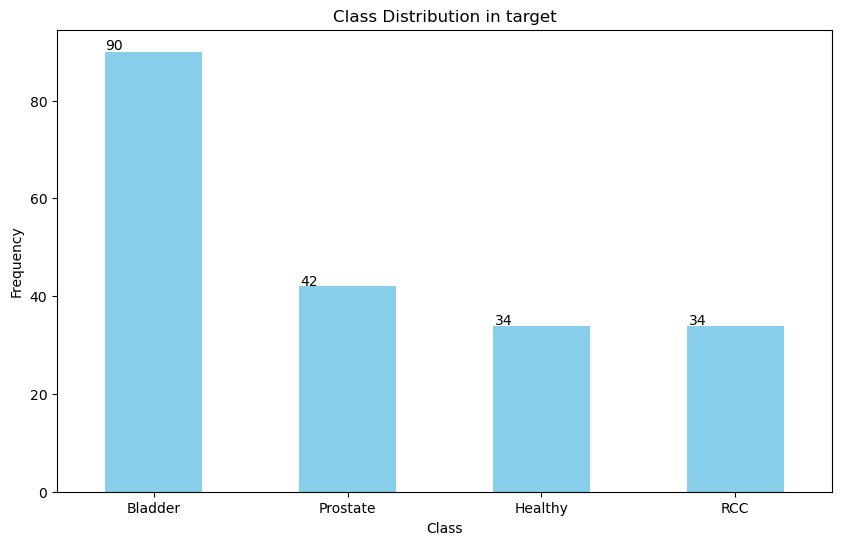

In [13]:

preprocessing.plot_class_distribution(EndMotif_t)

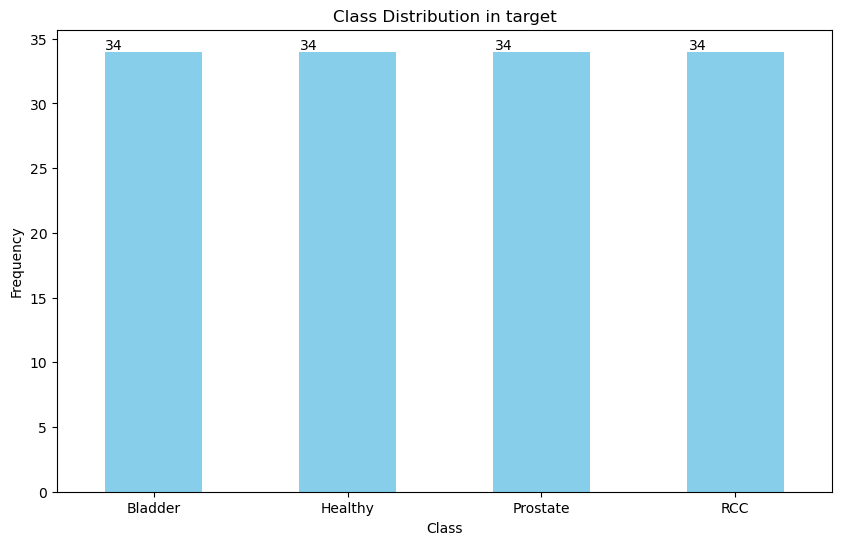

In [14]:

EndMotif_resampled = preprocessing.undersample_majority_class(EndMotif_t)
preprocessing.plot_class_distribution(EndMotif_resampled)

CNA_resampled = preprocessing.undersample_majority_class(CNA_t_unique)
Ratio_resampled = preprocessing.undersample_majority_class(Ratio_t)


In [15]:


TEST_SIZE = 0.3
CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)




In [16]:
CNA_resampled_train, CNA_resampled_test = preprocessing.stratified_train_test_split(CNA_resampled, test_size=TEST_SIZE)
Ratio_resampled_train, Ratio_resampled_test = preprocessing.stratified_train_test_split(CNA_resampled, test_size=TEST_SIZE)

In [17]:
EndMotif_Resampled_train, EndMotif_Resampled_test = preprocessing.stratified_train_test_split(EndMotif_resampled, test_size=TEST_SIZE)

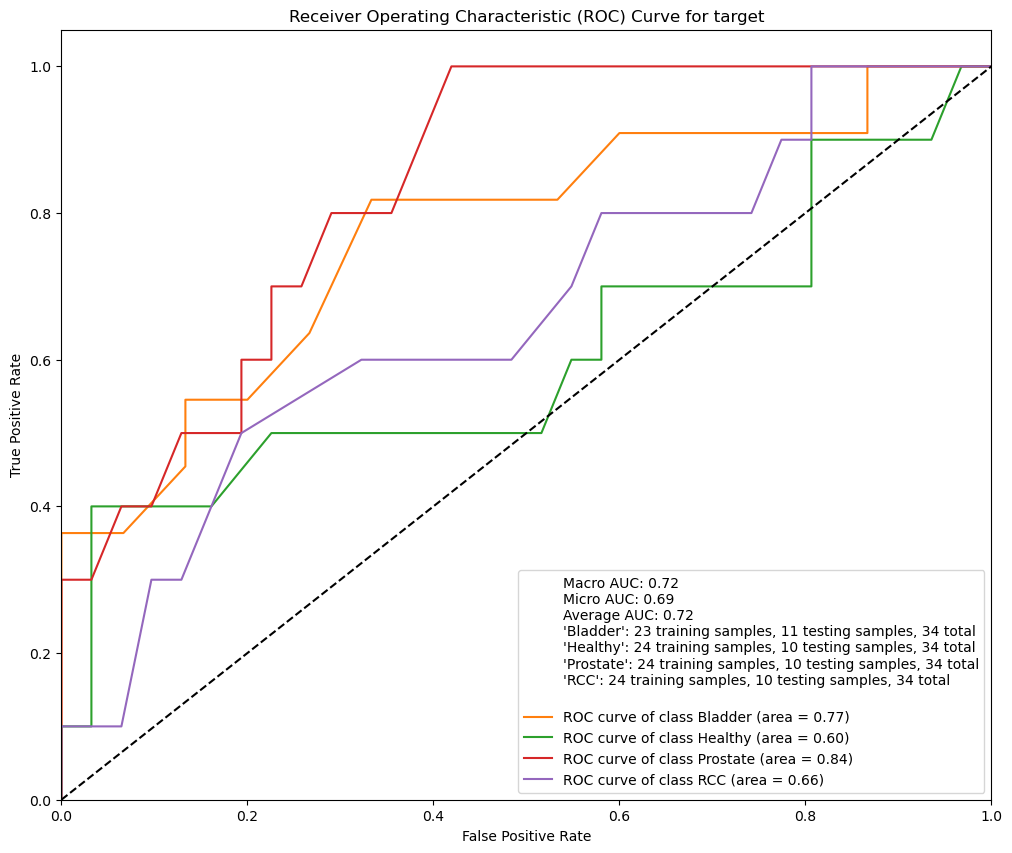

<Figure size 800x600 with 0 Axes>

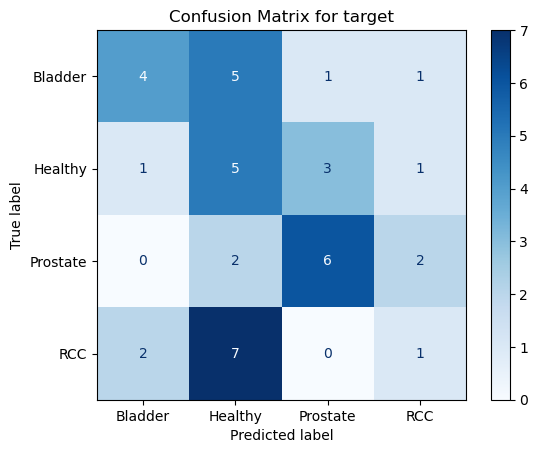

In [18]:
CNA_resampled_rf = models.train_model(CNA_resampled_train, CNA_resampled_test)

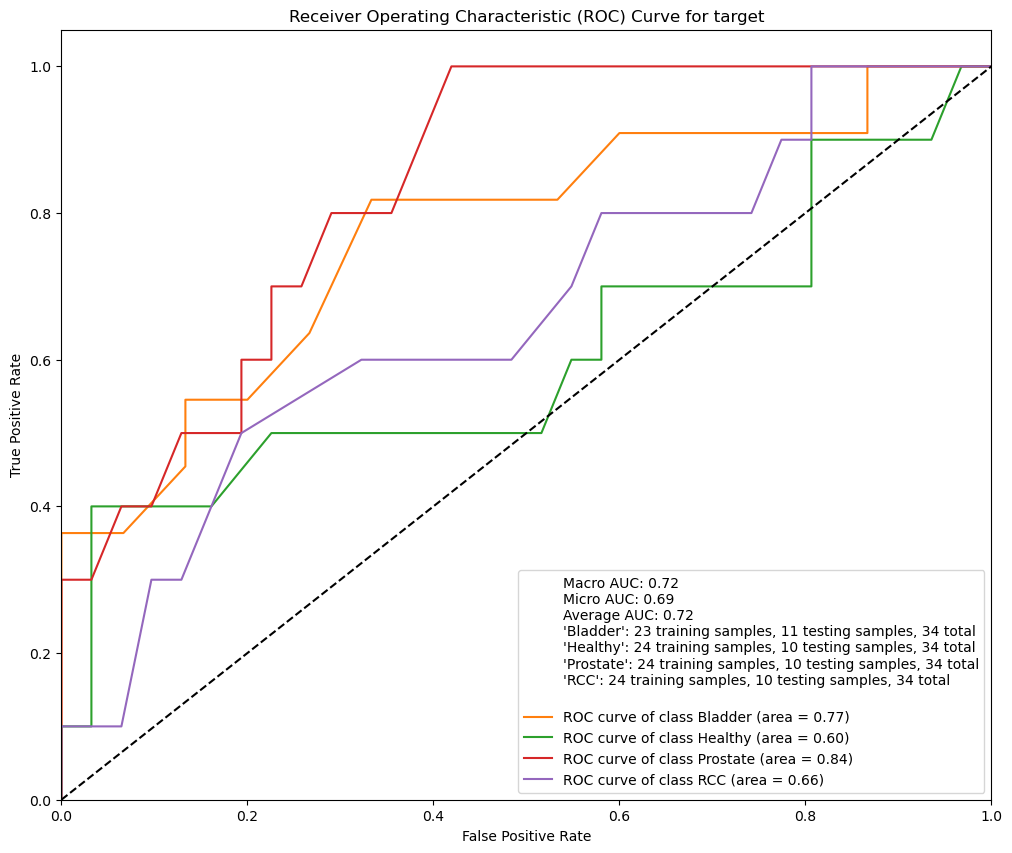

<Figure size 800x600 with 0 Axes>

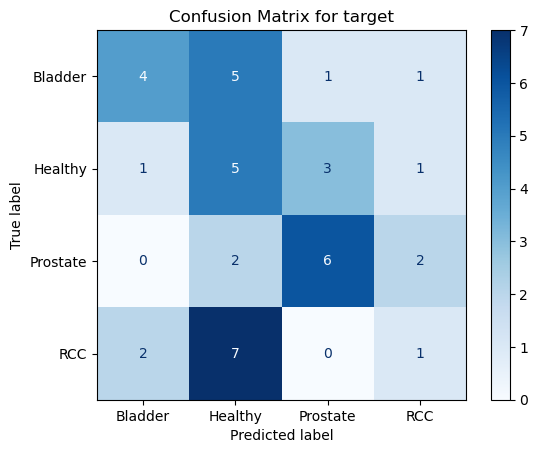

In [19]:
Ratio_resampled_rf  = models.train_model(Ratio_resampled_train, Ratio_resampled_test)

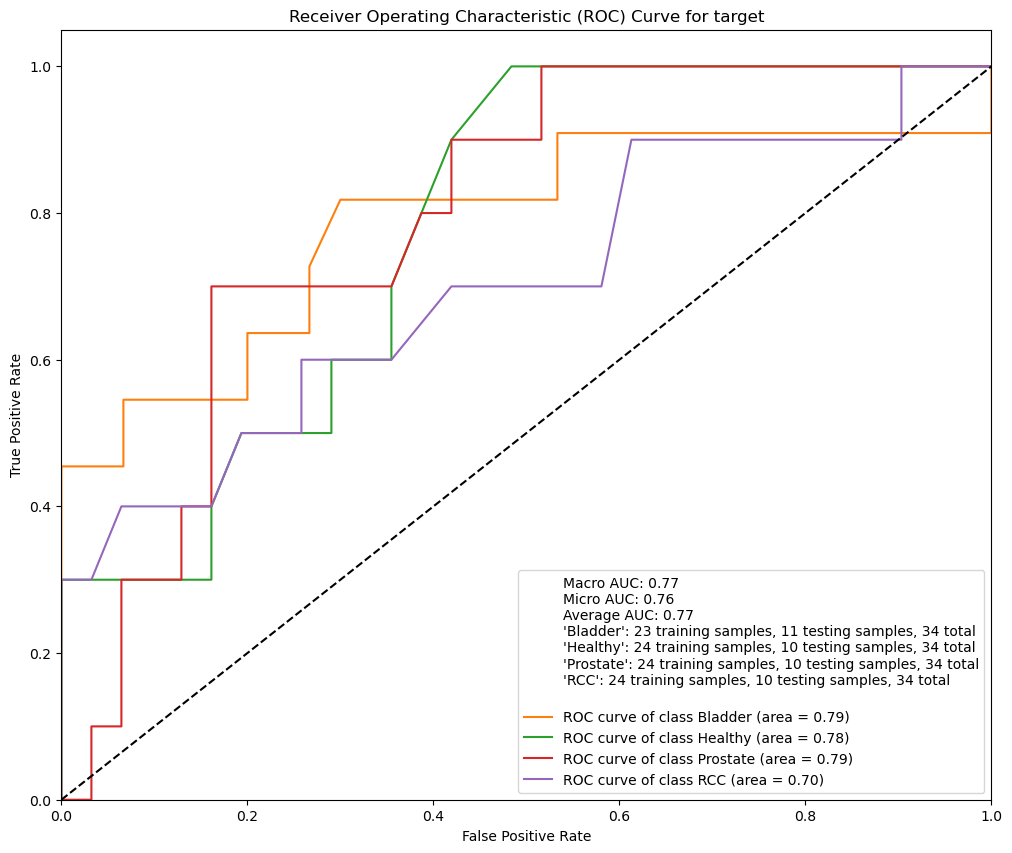

<Figure size 800x600 with 0 Axes>

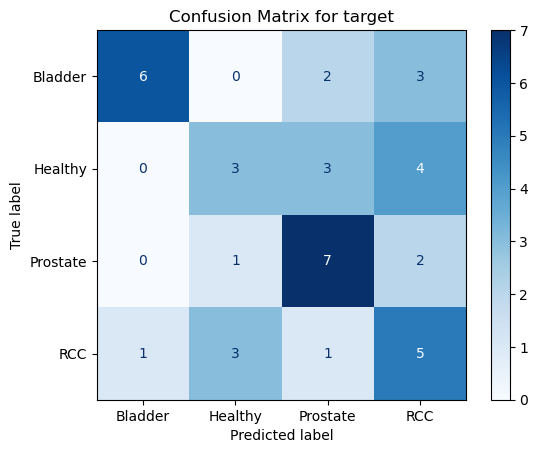

In [20]:
EndMotif_Resampled_rf = models.train_model(EndMotif_Resampled_train, EndMotif_Resampled_test)

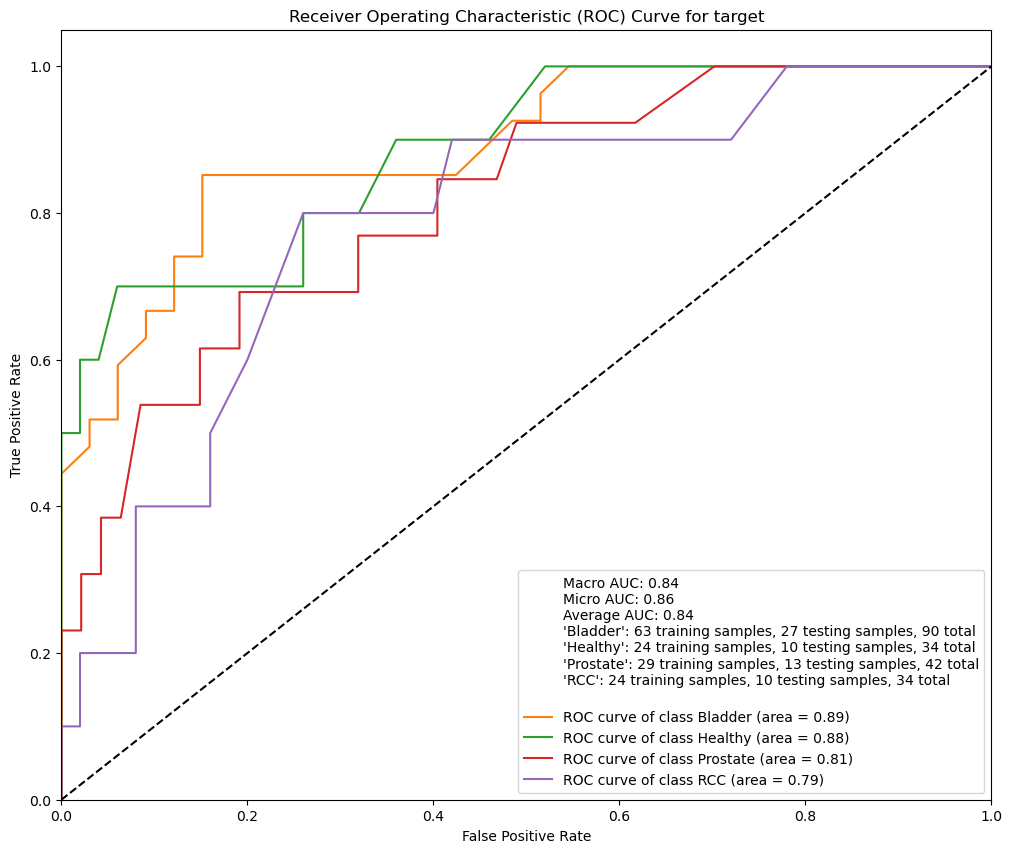

<Figure size 800x600 with 0 Axes>

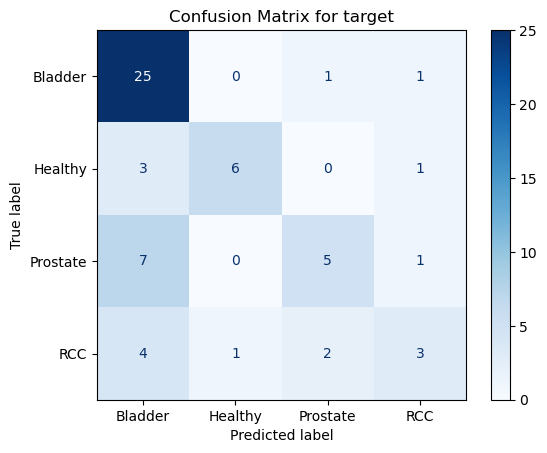

In [21]:
EndMotif_rf = models.train_model(EndMotif_train, EndMotif_test)

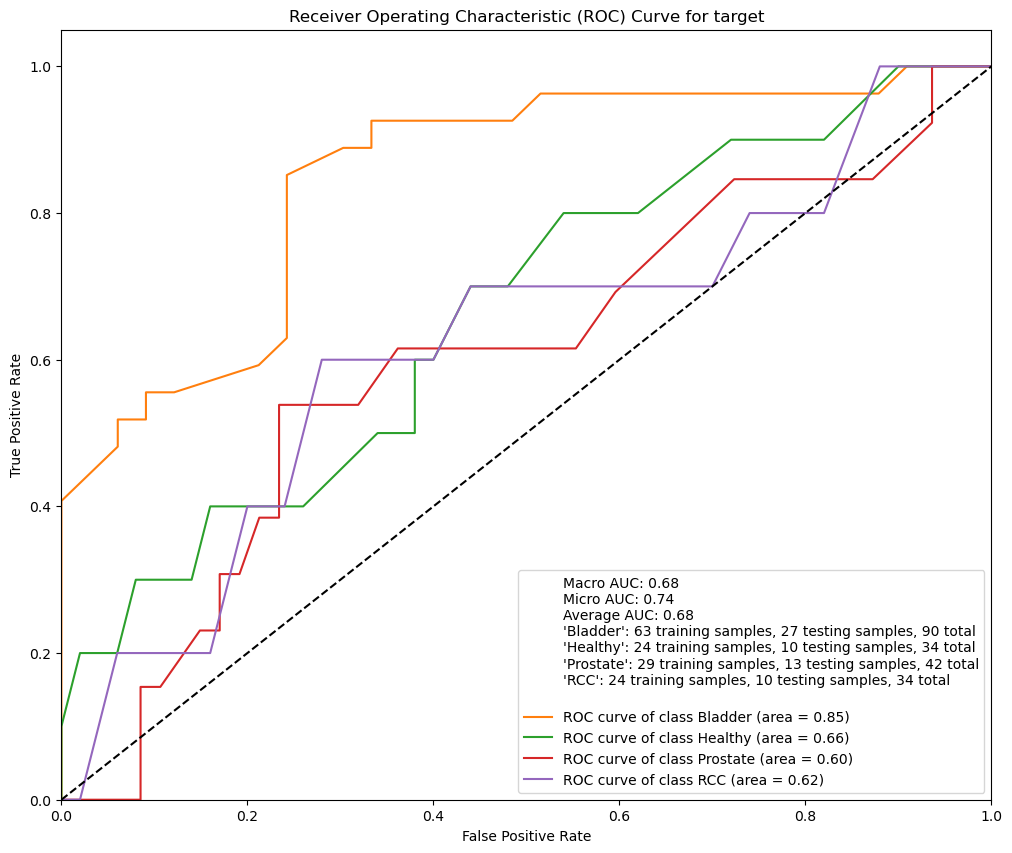

<Figure size 800x600 with 0 Axes>

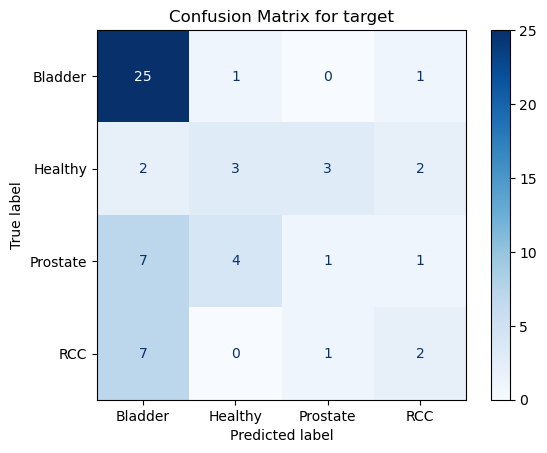

In [22]:
Ratio_rf = models.train_model(Ratio_train, Ratio_test)

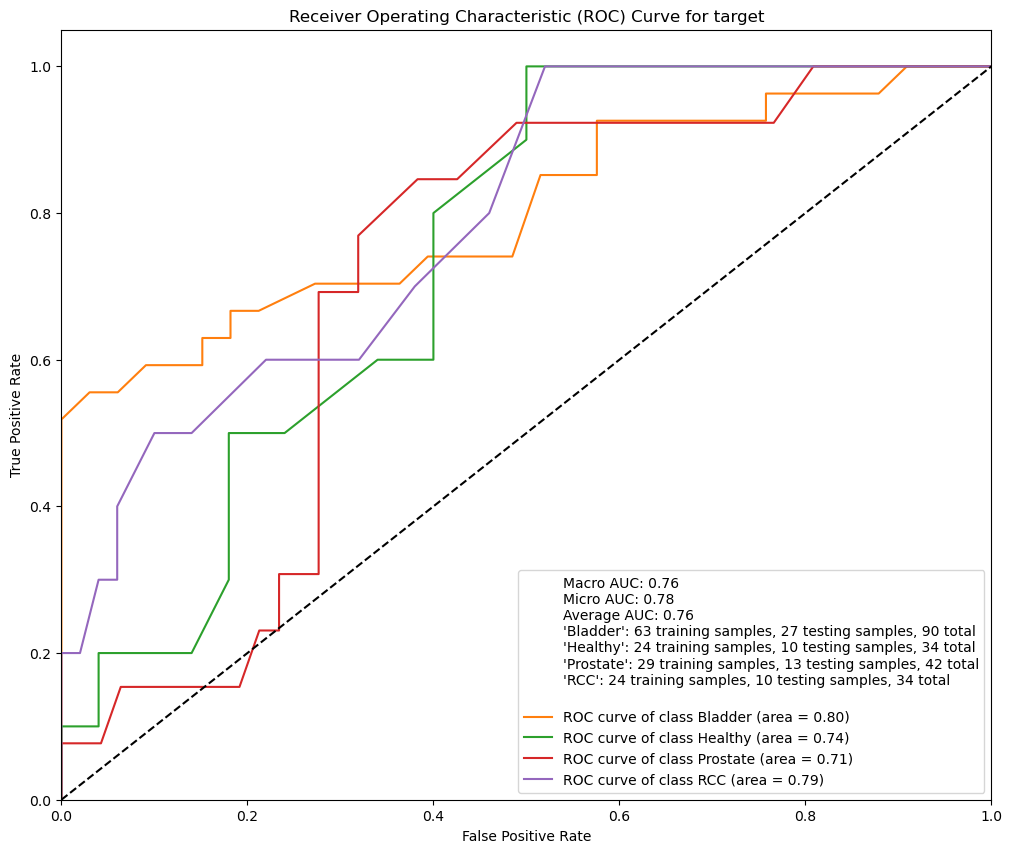

<Figure size 800x600 with 0 Axes>

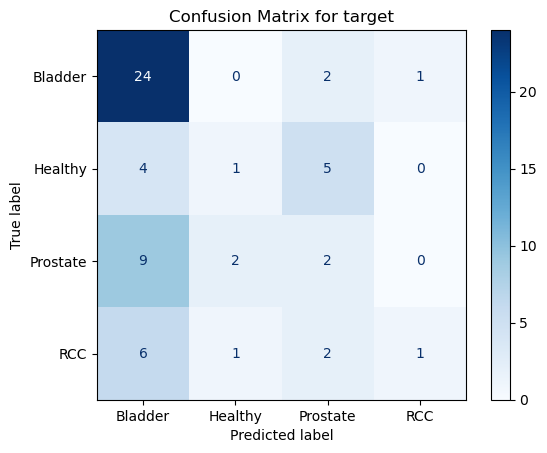

In [23]:
CNA_rf = models.train_model(CNA_train, CNA_test)

# Meta Model

## Combine all features to a single dataframe

In [24]:

CNA_scaled = preprocessing.standardize_dataframe(CNA_t_unique)
Ratio_scaled = preprocessing.standardize_dataframe(Ratio_t)
EndMotif_scaled = preprocessing.standardize_dataframe(EndMotif_t)





# CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

# Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

# EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)

display(CNA_scaled.head())

chr        chr1                                                              \
start  14000001  17000001  41000001  56000001  57000001  60000001  63000001   
end    15000000  18000000  42000000  57000000  58000000  61000000  64000000   
58    -0.833497 -0.174354 -0.234935 -0.568914 -0.577530 -0.190733 -0.634625   
73     1.203098 -0.174356 -0.234936 -0.568914  2.344747 -0.702694 -0.634625   
74    -0.872671 -0.174354 -0.234937 -0.568915 -0.577530 -0.702694 -0.634625   
81    -0.872671 -0.174356 -0.234936 -0.568915  0.550766 -0.702693  1.592896   
83     1.439763 -0.174355 -0.234937  1.443920 -0.577530  1.302196  0.291555   

chr                                  ...      chr9                      \
start  64000001  66000001  72000001  ...  20000001  25000001  76000001   
end    65000000  67000000  73000000  ...  21000000  26000000  77000000   
58     0.815185  1.767469 -0.296686  ...  0.857500 -0.297276 -0.679038   
73    -1.261367 -0.867445 -0.296686  ...  0.364634 -0.297275  1.002089   
74    -1.261367 -0.867445 -0.296685  ... -0.875459 -0.297276 -0.679039   
81     0.322590 -0.867444 -0.296687  ...  0.066062 -0.297275  1.321836   
83     2.049373  1.665714 -0.296687  ...  1.277846 -0.297275  0.845834   

chr                                                                 target  
start  79000001  80000001  82000001  84000001 108000001 133000001           
end    80000000  81000000  83000000  85000000 109000000 134000000           
58    -0.519978 -0.638758 -0.567794 -0.448915 -0.531417 -0.151539  Healthy  
73    -0.519976 -0.755579 -0.567794 -0.744429 -0.531417 -0.151537  Healthy  
74    -0.519976 -0.755580 -0.567793 -0.744429 -0.531417 -0.151538  Healthy  
81    -0.519976 -0.755579 -0.567793 -0.744429 -0.531417 -0.151540  Healthy  
83     0.967986  0.411682 -0.528000 -0.501081 -0.087482 -0.151539  Healthy  

[5 rows x 320 columns]

In [25]:
preprocessing.check_scaling(CNA_scaled)

Means:
 chr   start      end      
chr1  14000001   15000000    -8.915091e-16
      17000001   18000000    -9.020562e-17
      41000001   42000000     7.271961e-17
      56000001   57000000    -2.858824e-16
      57000001   58000000     2.776945e-16
                                  ...     
chr9  80000001   81000000    -7.466250e-17
      82000001   83000000     1.665335e-18
      84000001   85000000    -9.103829e-17
      108000001  109000000    1.437739e-16
      133000001  134000000    1.415534e-17
Length: 319, dtype: float64
Standard Deviations:
 chr   start      end      
chr1  14000001   15000000     1.002509
      17000001   18000000     1.002509
      41000001   42000000     1.002509
      56000001   57000000     1.002509
      57000001   58000000     1.002509
                                ...   
chr9  80000001   81000000     1.002509
      82000001   83000000     1.002509
      84000001   85000000     1.002509
      108000001  109000000    1.002509
      133000001  13400000

(chr   start      end      
 chr1  14000001   15000000    -8.915091e-16
       17000001   18000000    -9.020562e-17
       41000001   42000000     7.271961e-17
       56000001   57000000    -2.858824e-16
       57000001   58000000     2.776945e-16
                                   ...     
 chr9  80000001   81000000    -7.466250e-17
       82000001   83000000     1.665335e-18
       84000001   85000000    -9.103829e-17
       108000001  109000000    1.437739e-16
       133000001  134000000    1.415534e-17
 Length: 319, dtype: float64,
 chr   start      end      
 chr1  14000001   15000000     1.002509
       17000001   18000000     1.002509
       41000001   42000000     1.002509
       56000001   57000000     1.002509
       57000001   58000000     1.002509
                                 ...   
 chr9  80000001   81000000     1.002509
       82000001   83000000     1.002509
       84000001   85000000     1.002509
       108000001  109000000    1.002509
       133000001  134000000   

In [26]:
preprocessing.check_scaling(EndMotif_scaled)

Means:
 AAAA    6.217249e-17
AAAC    2.486900e-16
AAAG   -9.814372e-16
AAAT    1.429967e-15
AACA   -3.046452e-15
            ...     
TTGT   -3.042011e-15
TTTA   -7.105427e-17
TTTC   -4.174439e-16
TTTG   -1.341149e-15
TTTT   -3.552714e-16
Length: 256, dtype: float64
Standard Deviations:
 AAAA    1.002509
AAAC    1.002509
AAAG    1.002509
AAAT    1.002509
AACA    1.002509
          ...   
TTGT    1.002509
TTTA    1.002509
TTTC    1.002509
TTTG    1.002509
TTTT    1.002509
Length: 256, dtype: float64


(AAAA    6.217249e-17
 AAAC    2.486900e-16
 AAAG   -9.814372e-16
 AAAT    1.429967e-15
 AACA   -3.046452e-15
             ...     
 TTGT   -3.042011e-15
 TTTA   -7.105427e-17
 TTTC   -4.174439e-16
 TTTG   -1.341149e-15
 TTTT   -3.552714e-16
 Length: 256, dtype: float64,
 AAAA    1.002509
 AAAC    1.002509
 AAAG    1.002509
 AAAT    1.002509
 AACA    1.002509
           ...   
 TTGT    1.002509
 TTTA    1.002509
 TTTC    1.002509
 TTTG    1.002509
 TTTT    1.002509
 Length: 256, dtype: float64)

In [27]:
import preprocessing

combined_df = preprocessing.combine_feature_dfs_with_target([(CNA_scaled, 'CNA_'), (Ratio_scaled, 'Ratio_'), (EndMotif_scaled, 'EndMotif_')])

display(combined_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
58,-0.833497,-0.174354,-0.234935,-0.568914,-0.577530,-0.190733,-0.634625,0.815185,1.767469,-0.296686,...,0.164922,-0.068707,0.175644,0.144786,-0.186834,0.231427,0.182371,0.134733,-0.520127,Healthy
73,1.203098,-0.174356,-0.234936,-0.568914,2.344747,-0.702694,-0.634625,-1.261367,-0.867445,-0.296686,...,-0.636390,-0.930453,-0.687742,-0.690326,-0.705299,-1.400420,-1.450969,-1.437320,-1.105978,Healthy
74,-0.872671,-0.174354,-0.234937,-0.568915,-0.577530,-0.702694,-0.634625,-1.261367,-0.867445,-0.296685,...,1.114886,0.052911,0.357400,0.146201,0.156848,0.176355,0.691408,0.239424,1.172875,Healthy
81,-0.872671,-0.174356,-0.234936,-0.568915,0.550766,-0.702693,1.592896,0.322590,-0.867444,-0.296687,...,0.173107,0.187550,0.142041,0.184005,0.295762,-0.079452,-0.358506,-0.095353,-0.281223,Healthy
83,1.439763,-0.174355,-0.234937,1.443920,-0.577530,1.302196,0.291555,2.049373,1.665714,-0.296687,...,-3.450101,-1.161036,-1.216488,0.272828,-1.789916,-1.643104,-2.202688,-1.311776,-2.710900,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1318_UC1,-0.872671,-0.174358,-0.234936,-0.568914,-0.577529,-0.702694,-0.634626,-1.261368,-0.867445,-0.296687,...,-0.305324,-0.200614,-0.250347,-0.086933,0.177152,-0.314225,-0.328731,-0.081660,-0.093538,Bladder
WBC1320_UC1,-0.872671,-0.174358,-0.234936,-0.568915,-0.577530,-0.702694,-0.634625,-1.261367,-0.867445,-0.296686,...,4.010241,5.831723,4.795914,6.090572,6.838553,1.057290,1.245570,2.280089,-0.105750,Bladder
WBC1320_UC1b,-0.872672,-0.174357,-0.234936,-0.568914,-0.577530,-0.702694,-0.634624,-1.261368,-0.867444,-0.296687,...,4.478071,2.409849,2.724415,4.005245,5.146992,0.084580,0.386198,0.651968,0.471884,Bladder
WBC1322_UC1,-0.333971,-0.174355,-0.234937,-0.185363,-0.123310,-0.138178,-0.024929,-0.284813,-0.696531,-0.296686,...,-1.134482,-0.671661,-0.904637,-0.927349,-1.276922,-1.352733,-1.301888,-1.005230,-0.334518,Bladder


In [28]:
# Assuming 'combined_df' is the DataFrame you've generated
# Split the DataFrame using the predefined function
train_df, test_df = preprocessing.stratified_train_test_split(combined_df, test_size=TEST_SIZE)

# Extract the feature subsets by prefix from train_df and test_df
CNA_train_df = preprocessing.filter_columns_by_prefix(train_df, 'CNA_')
Ratio_train_df = preprocessing.filter_columns_by_prefix(train_df, 'Ratio_')
EndMotif_train_df = preprocessing.filter_columns_by_prefix(train_df, 'EndMotif_')

CNA_test_df = preprocessing.filter_columns_by_prefix(test_df, 'CNA_')
Ratio_test_df = preprocessing.filter_columns_by_prefix(test_df, 'Ratio_')
EndMotif_test_df = preprocessing.filter_columns_by_prefix(test_df, 'EndMotif_')



In [29]:
display(EndMotif_train_df)

,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
WBC1185_UC1,0.810359,0.125788,-0.024678,0.332048,0.331147,-0.470869,-1.130391,-0.148100,-0.092451,-0.785169,...,-0.035924,-0.557190,-1.130570,-1.156813,-0.757782,0.505741,-0.102659,-0.600508,0.447935,Bladder
WBC1083_UC1,0.913632,-1.050746,-1.164561,-1.049022,-0.620623,-0.847060,0.444067,-1.186269,-0.629452,-0.732862,...,-0.530711,0.441440,0.289132,0.056673,0.160490,0.231053,0.187139,0.286081,1.229727,Bladder
PB203_UC1,-0.346927,-0.404033,0.018738,-0.332765,-0.881957,-0.271360,0.388019,0.004054,-0.020921,0.535881,...,0.466406,-0.424178,0.017201,-0.296237,-0.537249,-0.219986,0.404363,-0.113857,0.046545,Prostate
NU70,0.047083,0.540603,0.316854,0.534803,-0.269057,0.467756,1.208370,0.547127,0.422026,0.753289,...,0.883549,1.793245,1.470099,1.295423,1.207644,1.290578,1.232655,2.053102,0.127370,Healthy
WBC1197_UC1,-0.344909,0.389650,-0.129516,0.631707,0.353433,-0.800719,-0.851621,0.171682,-0.481972,-0.929522,...,0.985142,-0.286959,-0.675405,-0.951973,-0.144670,1.339620,0.729526,0.128108,0.187740,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1188_UC1,0.164674,-0.838158,-0.257980,-0.738213,-0.433399,-1.362437,-1.373099,-0.991810,-0.805742,-1.174531,...,-0.441599,-0.949040,-1.280393,-1.539801,-1.376751,-0.120428,-0.425398,-1.237861,0.107939,Bladder
WBC1105_UC1,-0.749188,-0.080339,-0.877044,-1.012639,-0.380447,0.727684,1.685464,0.099851,-0.864676,0.189077,...,-0.342223,1.743625,1.811809,1.896025,1.225899,-0.661108,-0.229737,1.160063,-0.493611,Bladder
NU74,0.658783,-0.613802,-0.874383,-0.237062,-0.433559,-0.378116,0.027197,-0.309925,-0.340053,-0.538548,...,0.065212,0.326650,0.214257,0.121617,0.333433,0.135260,-0.267119,-0.199256,0.818951,Healthy
WBC1296_UC1,0.227681,0.562376,0.650748,0.221669,0.160282,0.246307,-0.037992,0.203689,0.592460,0.486346,...,0.325839,-0.386895,-0.310483,-0.288299,-0.162464,-0.054091,0.243208,0.037016,0.024658,Bladder


In [30]:
display(CNA_train_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,CNA_chr9-CNA_20000001-CNA_21000000,CNA_chr9-CNA_25000001-CNA_26000000,CNA_chr9-CNA_76000001-CNA_77000000,CNA_chr9-CNA_79000001-CNA_80000000,CNA_chr9-CNA_80000001-CNA_81000000,CNA_chr9-CNA_82000001-CNA_83000000,CNA_chr9-CNA_84000001-CNA_85000000,CNA_chr9-CNA_108000001-CNA_109000000,CNA_chr9-CNA_133000001-CNA_134000000,target
WBC1185_UC1,0.283462,-0.174354,-0.234937,0.174000,-0.245536,0.742575,-0.267900,0.389194,0.588933,-0.296685,...,-0.101704,-0.297275,-0.325386,-0.519977,-0.648426,0.559807,0.104844,-0.531416,-0.151541,Bladder
WBC1083_UC1,-0.199967,-0.174357,-0.234936,0.609300,-0.223157,0.311990,0.148832,0.723882,0.368303,-0.296686,...,-0.583367,5.416928,2.130159,2.693319,1.270185,1.309678,2.684231,1.952237,-0.151539,Bladder
PB203_UC1,0.081481,-0.174357,-0.234937,-0.568914,-0.577530,-0.699763,-0.634625,1.534258,1.010167,-0.296686,...,0.808711,-0.297275,-0.400605,-0.519978,0.088293,-0.567794,-0.125904,-0.531417,-0.151542,Prostate
NU70,-0.290771,-0.174356,-0.234936,-0.568914,-0.577530,-0.702694,-0.634624,-0.683005,-0.867444,-0.296686,...,-0.084196,-0.297275,-0.414148,-0.519977,-0.513130,-0.567794,-0.744429,-0.531418,-0.151541,Healthy
WBC1197_UC1,-0.150368,-0.174355,-0.234937,-0.568914,-0.577530,-0.702693,-0.634624,0.255118,1.151217,-0.296687,...,-0.225605,-0.297275,-0.530260,1.418791,-0.755580,-0.567793,-0.122931,-0.531416,-0.151538,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1188_UC1,2.014714,-0.174354,-0.234937,1.018785,0.542221,0.911941,0.785161,0.243209,0.981672,0.187498,...,-0.534348,-0.297275,0.394638,0.567131,-0.073362,0.190595,0.041301,0.593470,-0.151540,Bladder
WBC1105_UC1,-0.146284,-0.174356,-0.234936,-0.568915,-0.577529,-0.702693,-0.634626,-0.923174,-0.867445,-0.296688,...,-0.603810,-0.297276,-0.679038,-0.519978,-0.755580,-0.567793,-0.235051,-0.531417,-0.151542,Bladder
NU74,-0.173245,-0.174356,-0.234937,-0.568914,-0.577530,0.499693,-0.634624,-0.675167,-0.867445,-0.296687,...,-0.875459,-0.297275,-0.679038,-0.519977,-0.755579,-0.107792,1.581852,-0.531417,-0.151539,Healthy
WBC1296_UC1,-0.872671,-0.174354,-0.234936,-0.568915,-0.577530,-0.702693,-0.634624,-1.261368,-0.867445,-0.296686,...,-0.875459,-0.297275,-0.679039,-0.519977,-0.755579,-0.567793,-0.744429,-0.531416,-0.151541,Bladder


Best hyperparameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 5000}


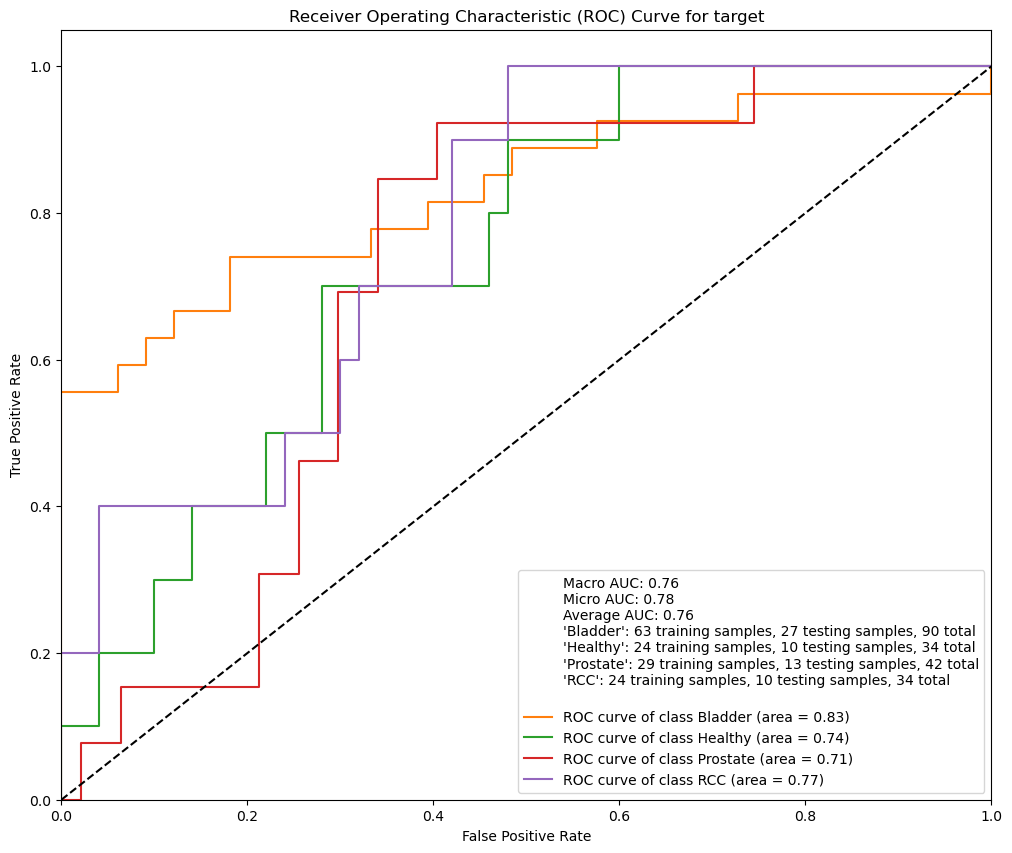

<Figure size 800x600 with 0 Axes>

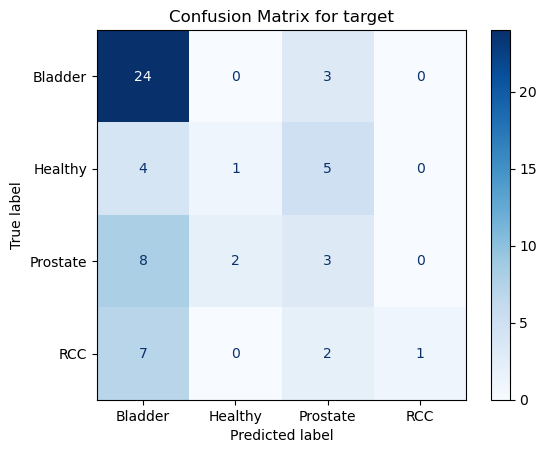

Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


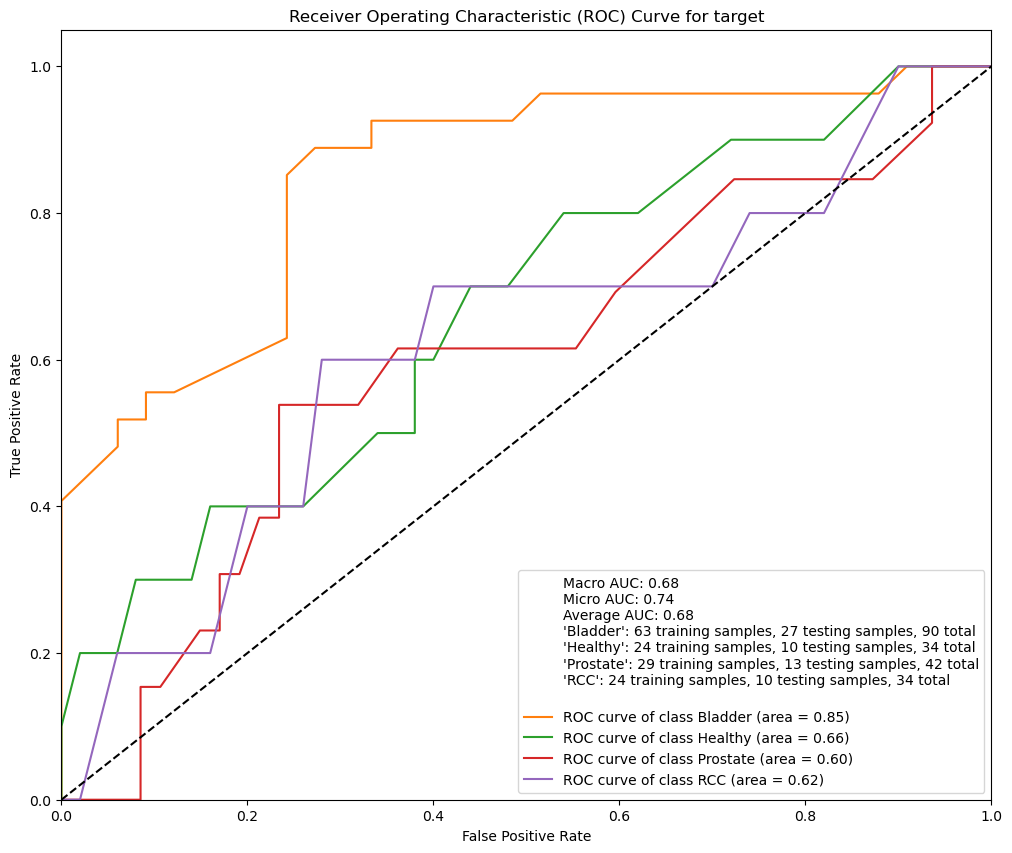

<Figure size 800x600 with 0 Axes>

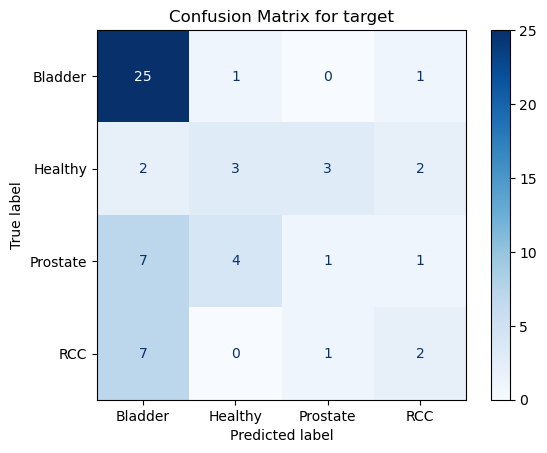

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}


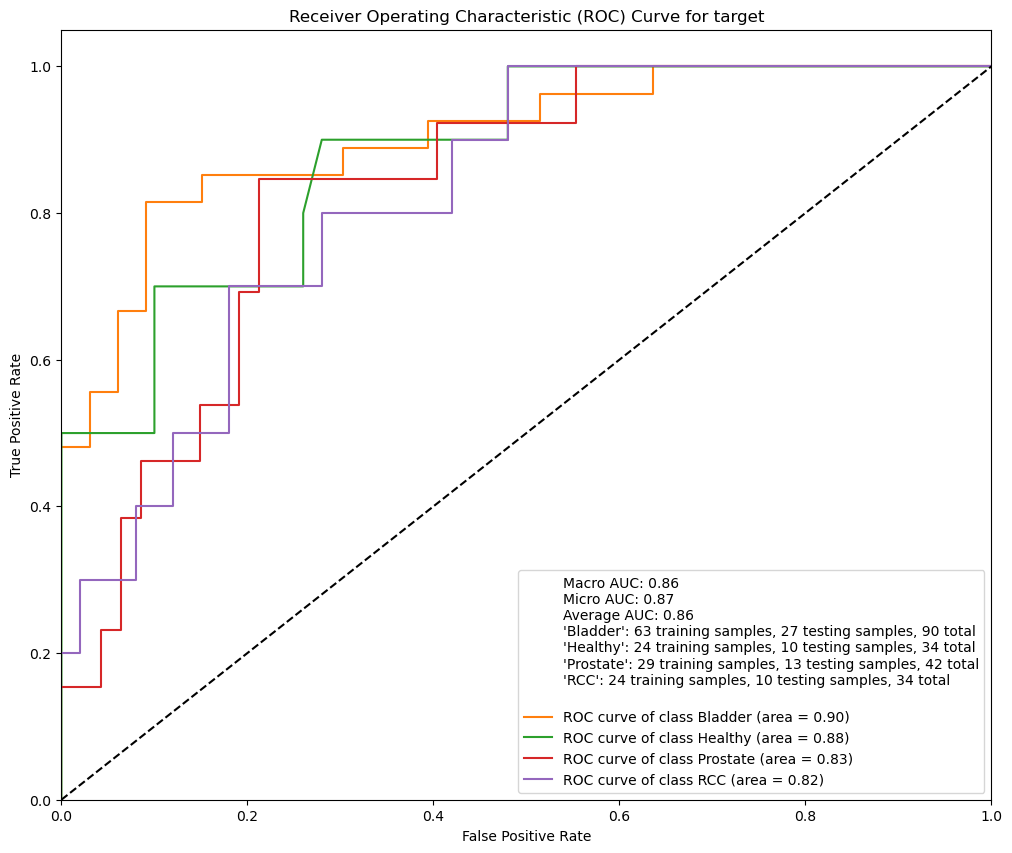

<Figure size 800x600 with 0 Axes>

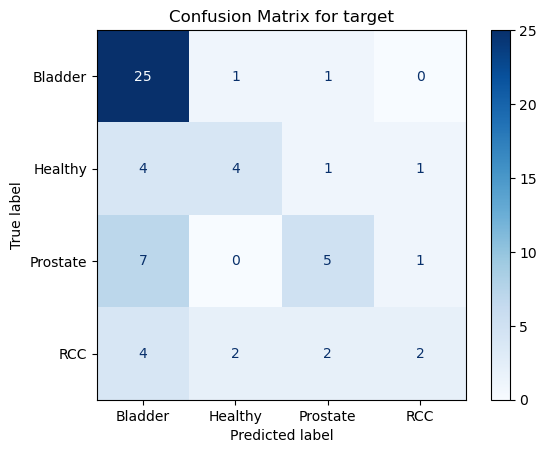

In [31]:
# # Train the models on their respective feature subsets using your train_model( function
from sklearn.ensemble import RandomForestClassifier
model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



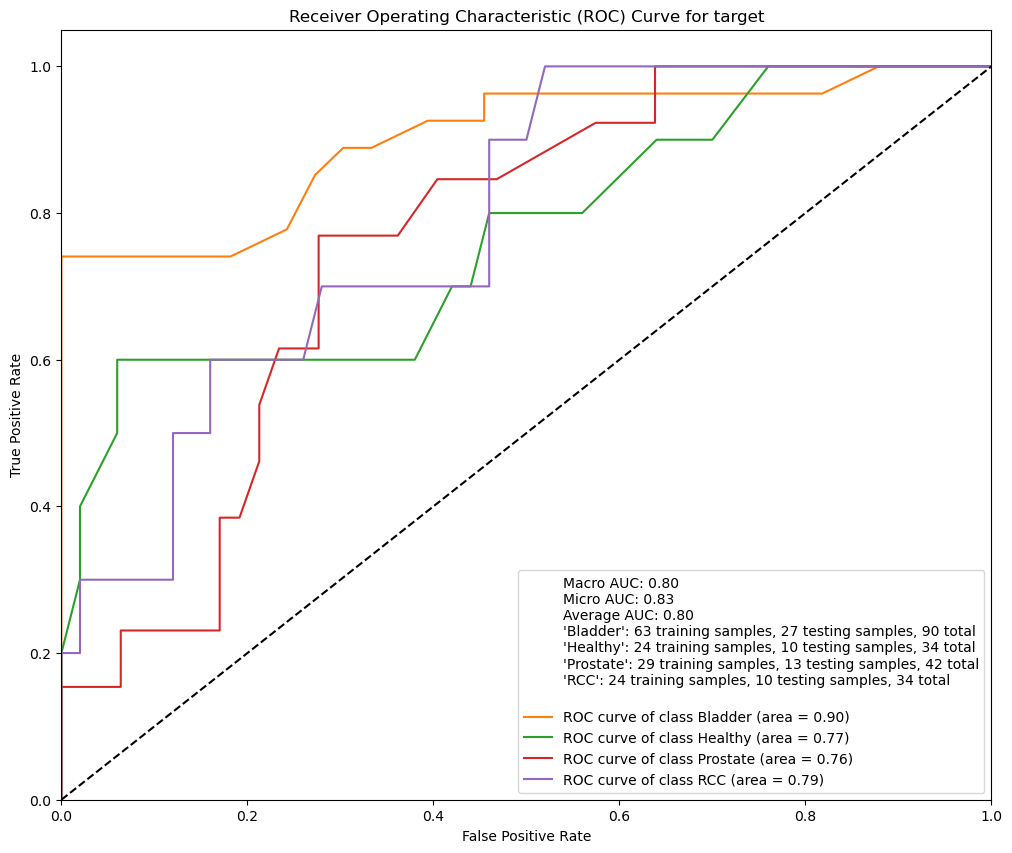

<Figure size 800x600 with 0 Axes>

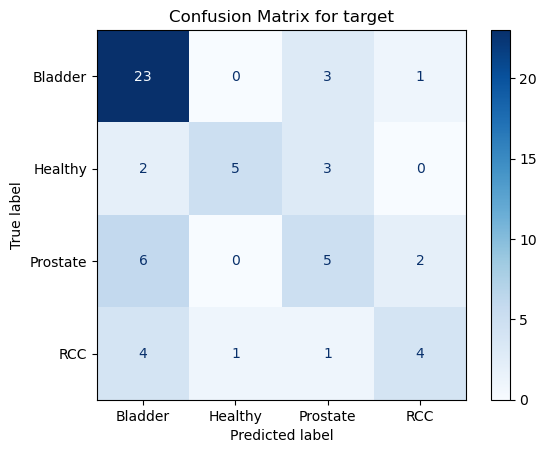

RandomForestClassifier(class_weight='balanced', random_state=0)

In [32]:
models.train_model(train_df, test_df)

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 5000}


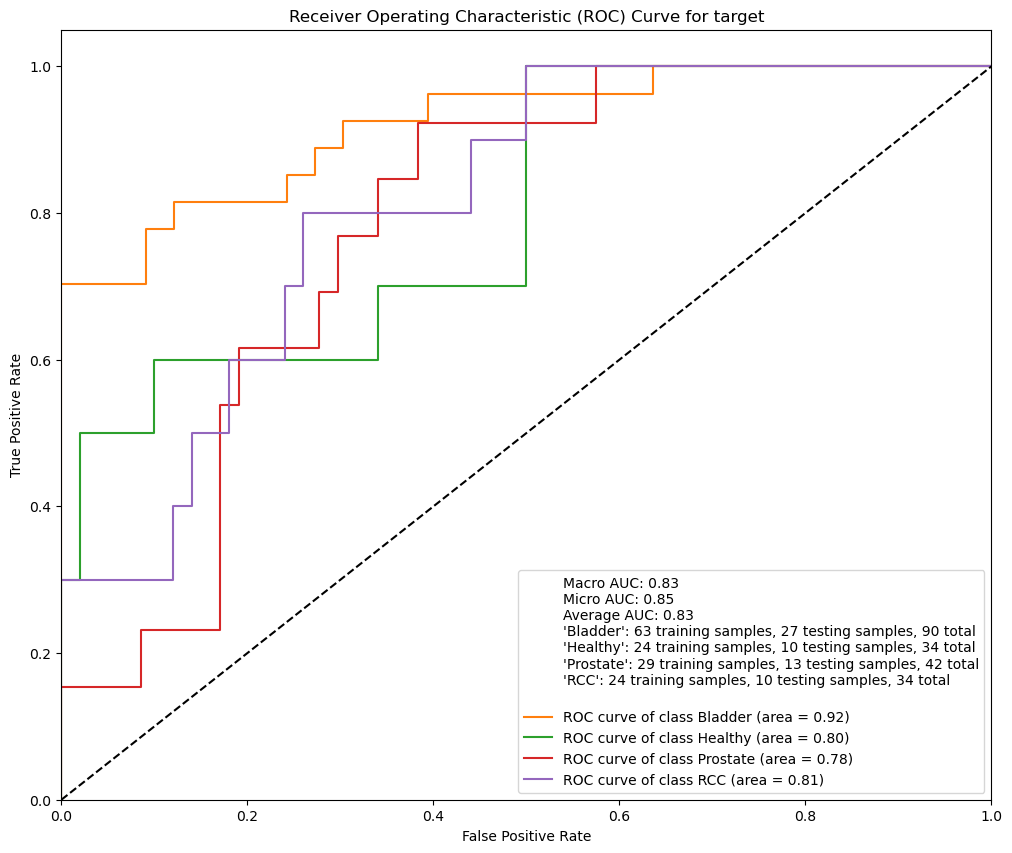

<Figure size 800x600 with 0 Axes>

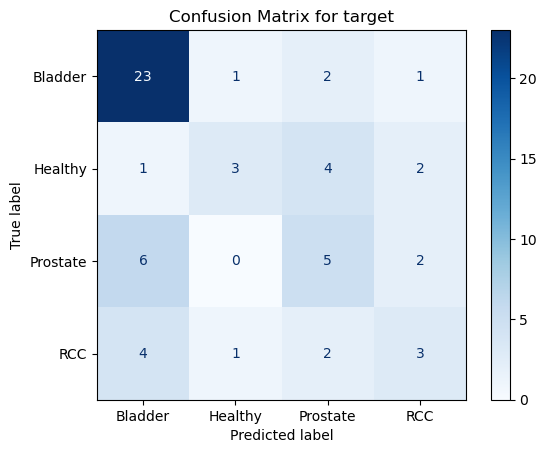

In [33]:





with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # Train with LogisticRegression and hyperparameter tuning using GridSearchCV
    trained_rf_model = models.train_model(
        train_df, 
        test_df, 
    
        
        param_grid=param_grid_rf, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
    )







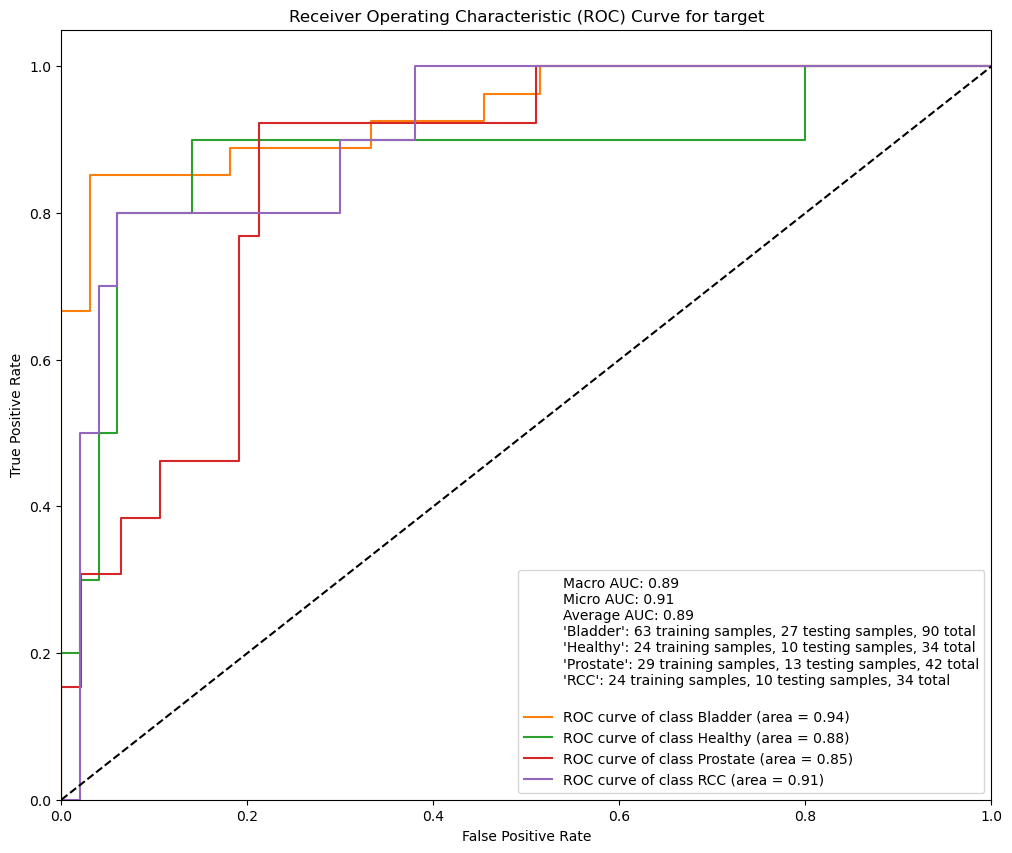

<Figure size 800x600 with 0 Axes>

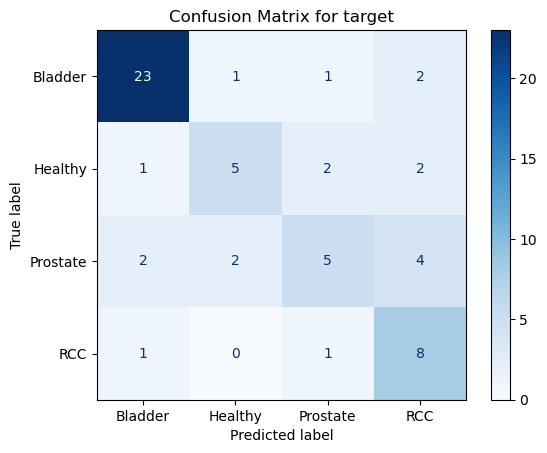

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [34]:
models.train_model(train_df, test_df, model=LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced'))

Best hyperparameters found: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


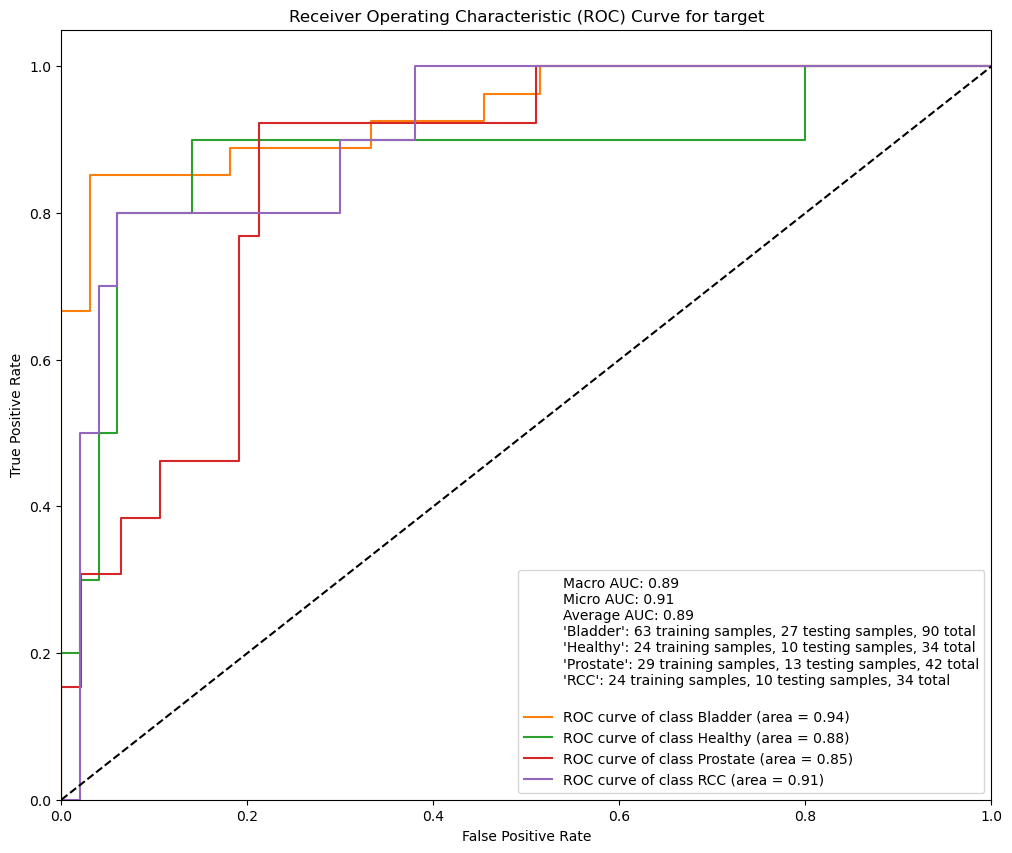

<Figure size 800x600 with 0 Axes>

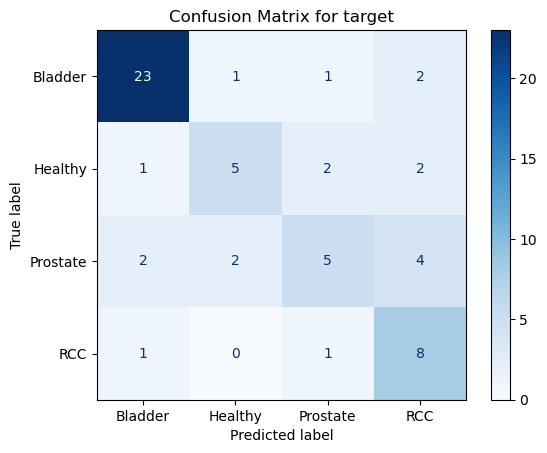

In [35]:


param_grid_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Removed 'none', ensuring only compatible solvers are paired
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization strength
    'solver': ['lbfgs','liblinear', 'saga'],         # Solvers compatible with l1 and elasticnet
    'max_iter': [200, 500, 1000],            # Increased max_iter for better convergence
    'l1_ratio': [0.5]                        # Used only with elasticnet
}



#log_reg_model = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')


# Suppress warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # Train with LogisticRegression and hyperparameter tuning using GridSearchCV
    trained_log_reg_model = models.train_model(
        train_df, 
        test_df, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
    )



/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is

Best hyperparameters found: {'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


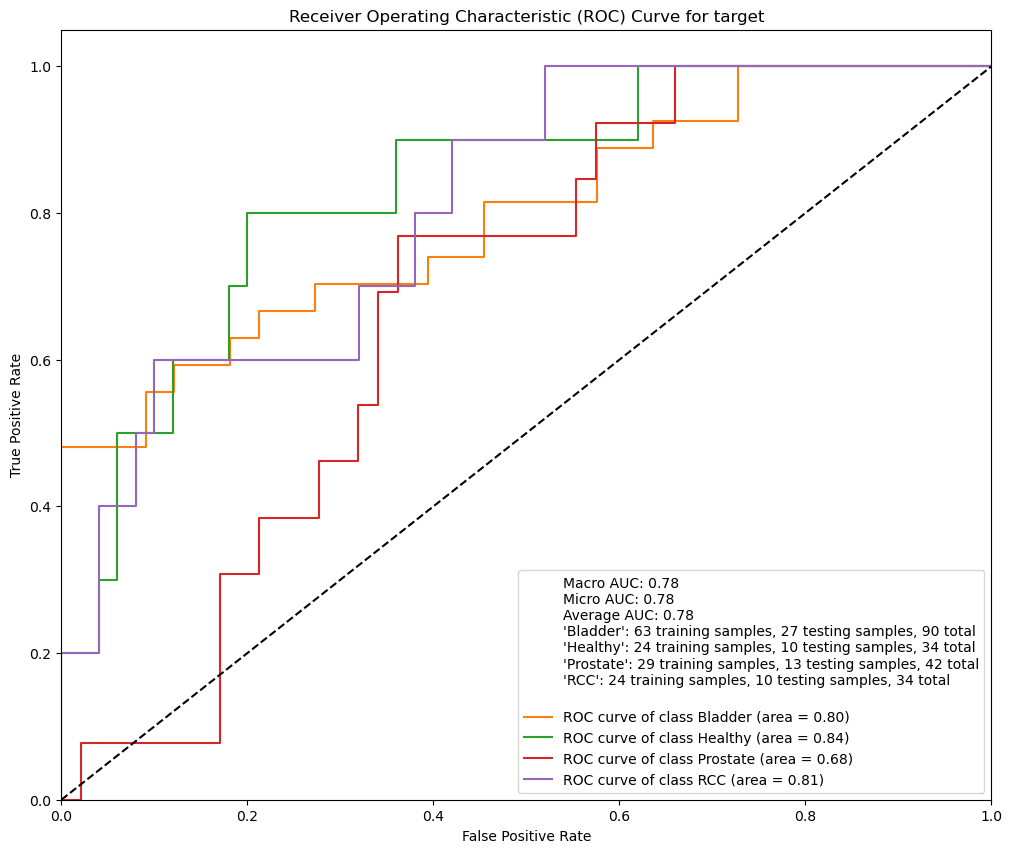

<Figure size 800x600 with 0 Axes>

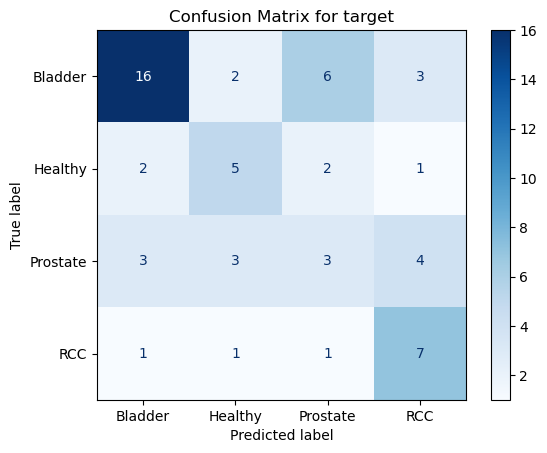

In [36]:
# Suppress warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter('ignore')




    models.train_model(CNA_train_df, CNA_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_micro',
            search_method='grid')
    



/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is

Best hyperparameters found: {'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


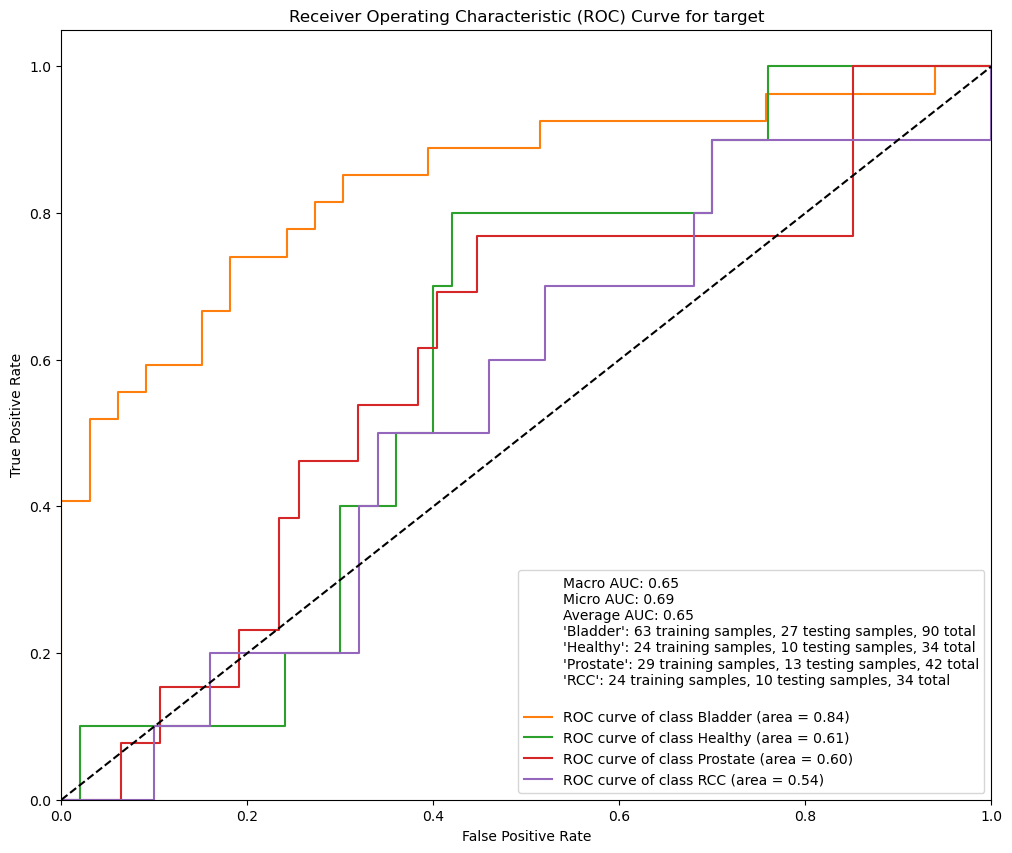

<Figure size 800x600 with 0 Axes>

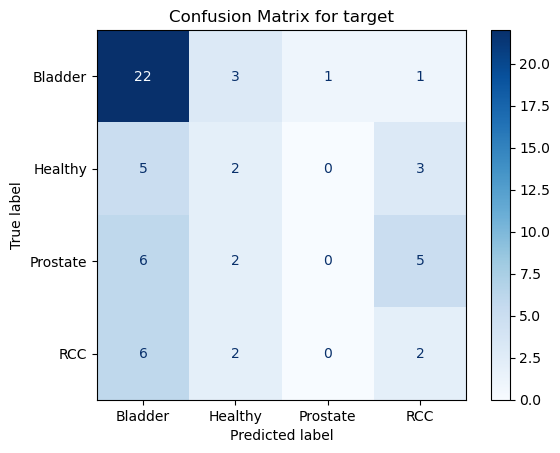

In [37]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    models.train_model(Ratio_train_df, Ratio_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_micro',
            search_method='grid')

/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ d

Best hyperparameters found: {'C': 10, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


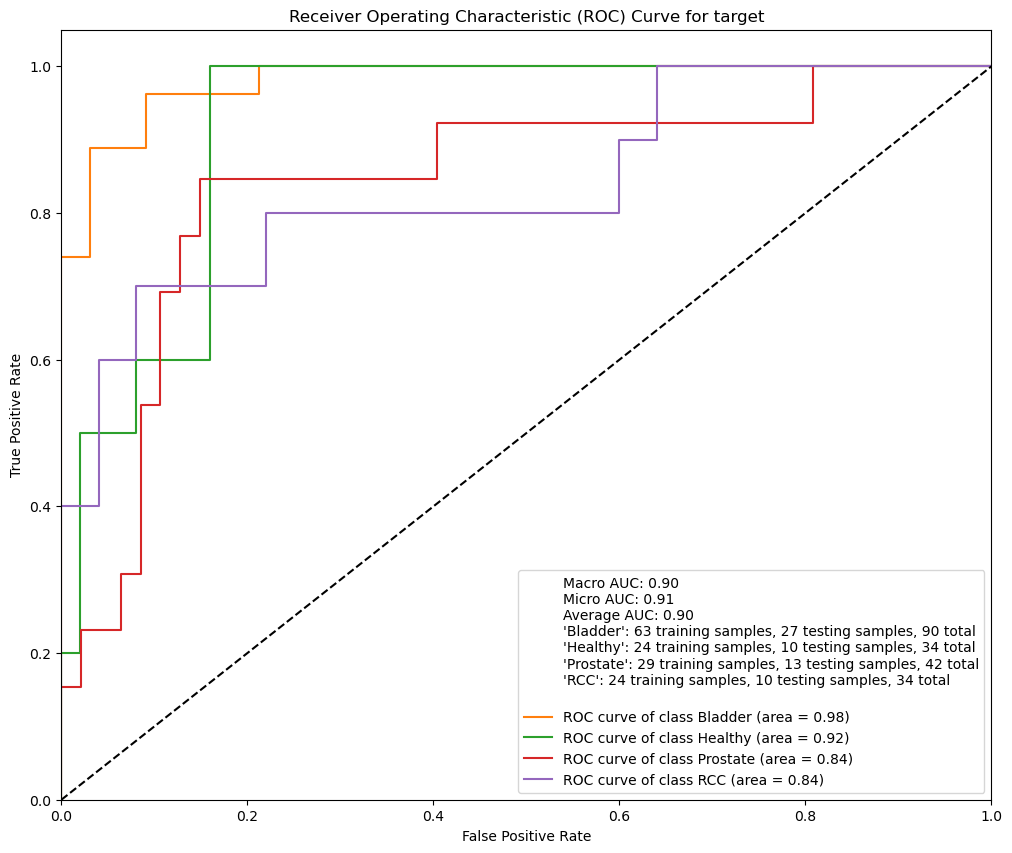

<Figure size 800x600 with 0 Axes>

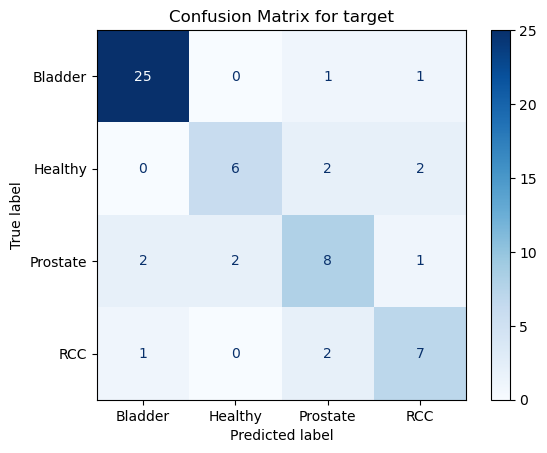

In [38]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_micro',
            search_method='grid')

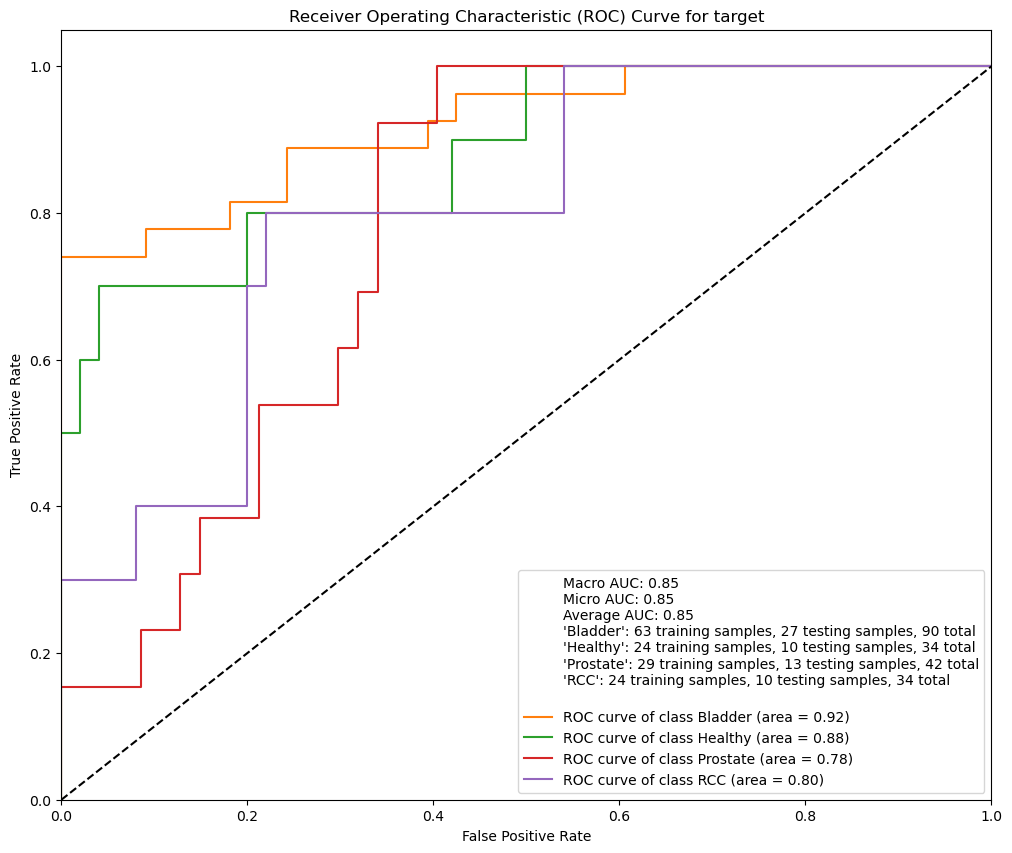

<Figure size 800x600 with 0 Axes>

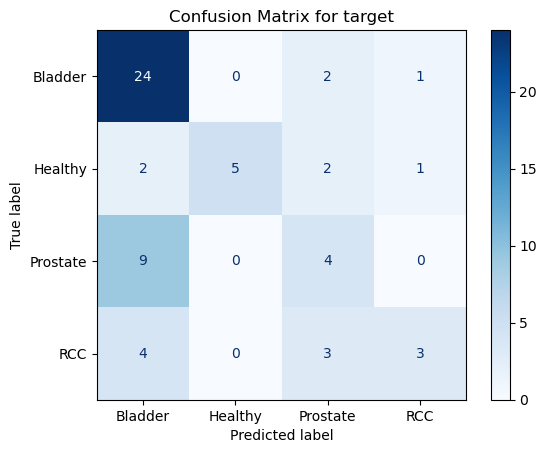

In [39]:
base_models = [model_CNA, model_Ratio, model_EndMotif]
train_dfs = [CNA_train_df, Ratio_train_df, EndMotif_train_df]
test_dfs = [CNA_test_df, Ratio_test_df, EndMotif_test_df]

meta_classifier = models.train_meta_classifier(base_models, train_dfs, test_dfs)

In [40]:
# from xgboost import XGBClassifier
# # Define your meta-classifier as XGBoost
# meta_classifier = XGBClassifier(random_state=0, n_estimators=100, learning_rate=0.1)

# Assuming base_models, train_dfs, and test_dfs are already defined
meta_classifier, y_meta_test_pred_decoded, y_meta_test = models.train_xgboost_meta_classifier(base_models, train_dfs, test_dfs)

# Output the true labels and the predicted labels
print("True labels:\n", y_meta_test.value_counts())
print("Predicted labels:\n", pd.Series(y_meta_test_pred_decoded).value_counts())

True labels:
 target
Bladder     27
Prostate    13
RCC         10
Healthy     10
Name: count, dtype: int64
Predicted labels:
 RCC        41
Bladder    17
Healthy     2
Name: count, dtype: int64


In [41]:
# model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



EndMotif_feature_importance = preprocessing.extract_feature_importances(model_EndMotif, EndMotif_train_df)

CNA_feature_importance = preprocessing.extract_feature_importances(model_CNA, CNA_train_df)

Ratio_feature_importance = preprocessing.extract_feature_importances(model_Ratio, Ratio_train_df)


In [42]:

print(EndMotif_feature_importance)

print(CNA_feature_importance)

print(Ratio_feature_importance)

           Feature  Importance
46   EndMotif_AGTG    0.011805
220  EndMotif_TCTA    0.011695
12   EndMotif_AATA    0.009536
15   EndMotif_AATT    0.009433
96   EndMotif_CGAA    0.008767
..             ...         ...
11   EndMotif_AAGT    0.001453
228  EndMotif_TGCA    0.001394
229  EndMotif_TGCC    0.001343
232  EndMotif_TGGA    0.001305
238  EndMotif_TGTG    0.001154

[256 rows x 2 columns]
                                  Feature  Importance
136    CNA_chr2-CNA_67000001-CNA_68000000    0.009869
163     CNA_chr20-CNA_7000001-CNA_8000000    0.009218
68    CNA_chr13-CNA_59000001-CNA_60000000    0.008391
302  CNA_chr8-CNA_113000001-CNA_114000000    0.007893
172   CNA_chr20-CNA_54000001-CNA_55000000    0.007761
..                                    ...         ...
246      CNA_chr6-CNA_8000001-CNA_9000000    0.001193
293    CNA_chr8-CNA_61000001-CNA_62000000    0.001187
54    CNA_chr12-CNA_24000001-CNA_25000000    0.001143
57    CNA_chr12-CNA_65000001-CNA_66000000    0.001024
105     CN

In [43]:
feature_importances_dict = {
    'EndMotif': EndMotif_feature_importance,
    'CNA': CNA_feature_importance,
    'Ratio': Ratio_feature_importance
}

train_subset, test_subset = preprocessing.subset_top_k_features(train_df, test_df, k=300, feature_importances_dict=feature_importances_dict, target_name='target')

display(train_subset.head())
display(test_subset.head())

,Ratio_chr11-Ratio_80000000-Ratio_85000000,EndMotif_GCAA,EndMotif_AGCT,CNA_chr21-CNA_35000001-CNA_36000000,CNA_chr8-CNA_120000001-CNA_121000000,CNA_chr2-CNA_146000001-CNA_147000000,CNA_chr13-CNA_72000001-CNA_73000000,Ratio_chr2-Ratio_25000000-Ratio_30000000,Ratio_chr1-Ratio_215000000-Ratio_220000000,EndMotif_GCGG,...,CNA_chr4-CNA_15000001-CNA_16000000,EndMotif_CGGC,Ratio_chr7-Ratio_115000000-Ratio_120000000,Ratio_chr9-Ratio_100000000-Ratio_105000000,CNA_chr7-CNA_21000001-CNA_22000000,Ratio_chr10-Ratio_70000000-Ratio_75000000,CNA_chr3-CNA_108000001-CNA_109000000,CNA_chr9-CNA_79000001-CNA_80000000,EndMotif_ACGG,target
WBC1185_UC1,0.193109,-0.857642,-0.599634,0.748467,0.086985,0.892817,0.377634,-0.198152,0.183584,0.228125,...,-0.249722,0.249603,0.172433,0.210316,0.364033,-0.239791,-0.217722,-0.519977,0.529894,Bladder
WBC1083_UC1,-0.046475,0.689245,-0.870378,1.255268,0.868640,1.469657,-0.194925,-0.174021,0.259465,1.157560,...,0.352550,1.280435,0.110586,0.151552,1.303769,-0.313420,0.664696,2.693319,1.020786,Bladder
PB203_UC1,0.078197,-0.021823,0.350169,-0.605797,-0.007696,1.106212,0.852871,-0.116051,0.056510,0.036952,...,0.442112,0.971534,0.088685,0.099883,0.066984,-0.103691,-0.002931,-0.519978,-0.074142,Prostate
NU70,0.020690,1.462779,0.080875,-0.605797,-0.721894,-0.987855,-0.872521,-0.031530,0.050167,-0.000653,...,-0.953692,0.391546,0.038529,0.024396,-0.879094,0.026597,-0.681113,-0.519977,-0.427087,Healthy
WBC1197_UC1,0.134269,-1.327039,-0.214402,0.286438,0.079177,0.348110,-0.349865,-0.143647,0.136619,-0.311322,...,1.293904,-0.630083,0.131976,0.140685,-0.136751,-0.163728,-0.681113,1.418791,-0.416981,Bladder


,Ratio_chr11-Ratio_80000000-Ratio_85000000,EndMotif_GCAA,EndMotif_AGCT,CNA_chr21-CNA_35000001-CNA_36000000,CNA_chr8-CNA_120000001-CNA_121000000,CNA_chr2-CNA_146000001-CNA_147000000,CNA_chr13-CNA_72000001-CNA_73000000,Ratio_chr2-Ratio_25000000-Ratio_30000000,Ratio_chr1-Ratio_215000000-Ratio_220000000,EndMotif_GCGG,...,CNA_chr4-CNA_15000001-CNA_16000000,EndMotif_CGGC,Ratio_chr7-Ratio_115000000-Ratio_120000000,Ratio_chr9-Ratio_100000000-Ratio_105000000,CNA_chr7-CNA_21000001-CNA_22000000,Ratio_chr10-Ratio_70000000-Ratio_75000000,CNA_chr3-CNA_108000001-CNA_109000000,CNA_chr9-CNA_79000001-CNA_80000000,EndMotif_ACGG,target
WBC1085_UC1,-0.202520,-0.528582,-1.285342,0.354831,0.765697,1.388763,-0.495090,-0.186539,0.310863,0.053335,...,0.027611,-0.076659,0.206341,0.228657,1.141407,-0.529016,0.652899,2.473380,0.354109,Bladder
PB-162_UC1,0.577001,1.404838,-0.914809,-0.605797,-0.721894,-1.041448,-0.872522,-0.539268,0.402913,1.056845,...,-0.953693,1.114293,0.396591,0.534521,-0.879094,-0.899638,-0.681113,-0.519978,0.390613,Prostate
WBC1096_UC1,0.596294,1.973671,0.080416,0.994119,1.345083,-0.123419,0.783159,-0.512611,0.600857,0.532337,...,0.218617,0.505682,0.343015,0.217449,1.412337,-0.952243,0.988126,2.946211,-0.111977,Bladder
PB-394_UC1,0.121395,1.257368,-0.426999,-0.605798,-0.721893,-1.041448,-0.554480,-0.110868,0.068704,-0.334623,...,-0.953692,0.801802,0.106408,0.067124,-0.879094,-0.244948,-0.681113,-0.519977,-0.362504,Prostate
WBC1322_UC1,0.320404,-0.003717,-0.299163,0.455978,1.833673,0.200187,-0.075822,-0.188315,0.301304,0.420467,...,-0.138484,0.409317,0.168462,0.259025,2.040360,-0.267729,-0.073735,0.540536,0.707541,Bladder


/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is

Best hyperparameters found: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


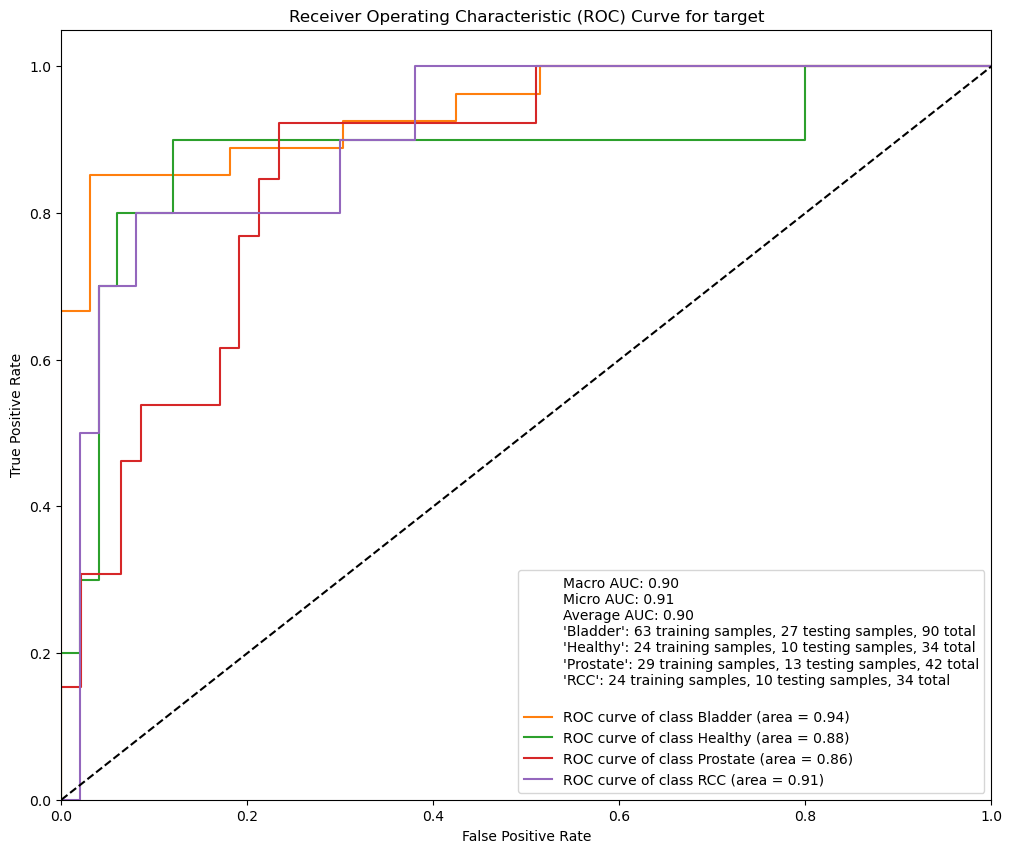

<Figure size 800x600 with 0 Axes>

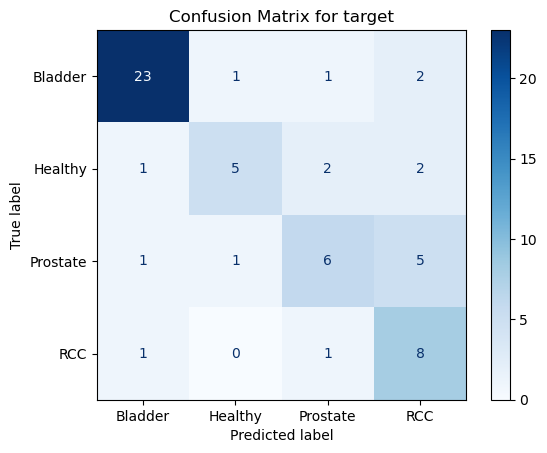

In [44]:
# Suppress warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # Train with LogisticRegression and hyperparameter tuning using GridSearchCV
    trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
    )

# Biological Significance
## End motif

In [47]:
EndMotif_feature_importance.head()

,Feature,Importance
46,EndMotif_AGTG,0.011805
220,EndMotif_TCTA,0.011695
12,EndMotif_AATA,0.009536
15,EndMotif_AATT,0.009433
96,EndMotif_CGAA,0.008767


In [57]:
EndMotif_feature_importance.tail()

,Feature,Importance
11,EndMotif_AAGT,0.001453
228,EndMotif_TGCA,0.001394
229,EndMotif_TGCC,0.001343
232,EndMotif_TGGA,0.001305
238,EndMotif_TGTG,0.001154


In [48]:
#train_df, test_df
train_df.head()

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
WBC1185_UC1,0.283462,-0.174354,-0.234937,0.174000,-0.245536,0.742575,-0.267900,0.389194,0.588933,-0.296685,...,-0.035924,-0.557190,-1.130570,-1.156813,-0.757782,0.505741,-0.102659,-0.600508,0.447935,Bladder
WBC1083_UC1,-0.199967,-0.174357,-0.234936,0.609300,-0.223157,0.311990,0.148832,0.723882,0.368303,-0.296686,...,-0.530711,0.441440,0.289132,0.056673,0.160490,0.231053,0.187139,0.286081,1.229727,Bladder
PB203_UC1,0.081481,-0.174357,-0.234937,-0.568914,-0.577530,-0.699763,-0.634625,1.534258,1.010167,-0.296686,...,0.466406,-0.424178,0.017201,-0.296237,-0.537249,-0.219986,0.404363,-0.113857,0.046545,Prostate
NU70,-0.290771,-0.174356,-0.234936,-0.568914,-0.577530,-0.702694,-0.634624,-0.683005,-0.867444,-0.296686,...,0.883549,1.793245,1.470099,1.295423,1.207644,1.290578,1.232655,2.053102,0.127370,Healthy
WBC1197_UC1,-0.150368,-0.174355,-0.234937,-0.568914,-0.577530,-0.702693,-0.634624,0.255118,1.151217,-0.296687,...,0.985142,-0.286959,-0.675405,-0.951973,-0.144670,1.339620,0.729526,0.128108,0.187740,Bladder


In [64]:
import Biological_significace as Biosig
import os

def save_plots_and_create_summary(df, feature_df, save_dir, target_name='target'):
    """
    This function generates and saves box plots for each feature listed in the 'Feature' column of feature_df,
    saves the plots using the plot_feature_boxplot_with_anova function, and creates a summary DataFrame containing
    the F-statistic and p-value for each feature.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    feature_df (pd.DataFrame): A DataFrame with a column named 'Feature' listing the features to analyze.
    target_name (str): The name of the target column in df, default is 'target'.
    save_dir (str): The directory where the plots and summary will be saved. This is a required argument.
    
    Returns:
    pd.DataFrame: A DataFrame containing the F-statistic and p-value for each feature.
    """
    # Check if the directory already exists, if so, raise an error
    if os.path.exists(save_dir):
        raise FileExistsError(f"The directory '{save_dir}' already exists. Please choose a different directory or remove it.")
    
    # Create the save directory
    os.makedirs(save_dir)
    
    summary = []

    class_order= ['Bladder','Prostate','RCC','Healthy']
    
    for feature in feature_df['Feature']:
        # Define the save path for each plot
        save_path = os.path.join(save_dir, f"{feature}.png")
        
        # Generate and save the plot, and get the F-statistic and p-value
        f_stat, p_value = Biosig.plot_feature_boxplot_with_anova(df, feature, target_name=target_name, save_path=save_path, class_order = class_order)
        
        # Append the results to the summary list
        summary.append({
            'Feature': feature,
            'F-statistic': f_stat,
            'p-value': p_value
        })
    
    # Create a summary DataFrame from the list
    summary_df = pd.DataFrame(summary)
    
    # Save the summary DataFrame as a CSV file in the save directory
    summary_csv_path = os.path.join(save_dir, 'summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    
    # Return the summary DataFrame
    return summary_df


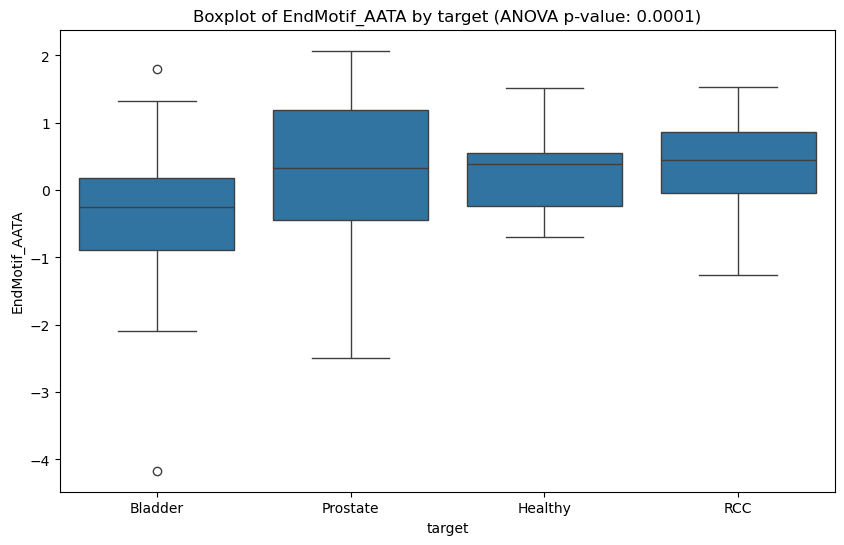

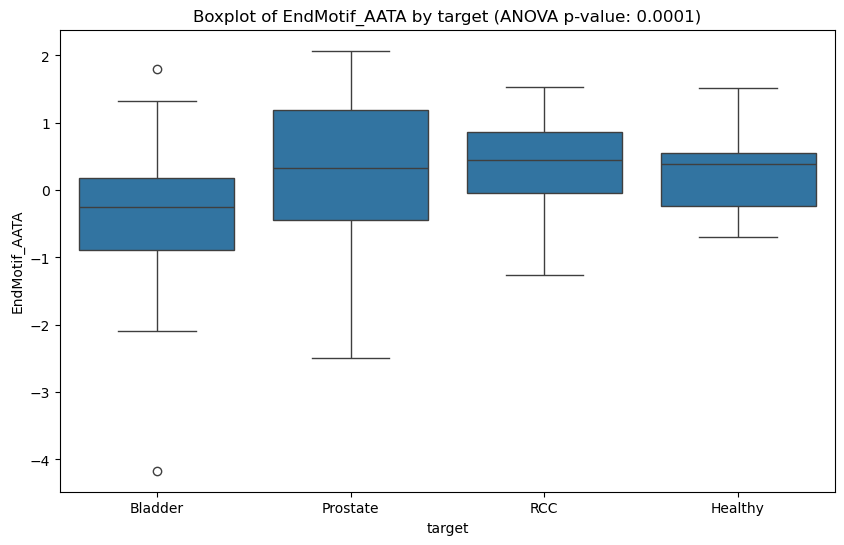

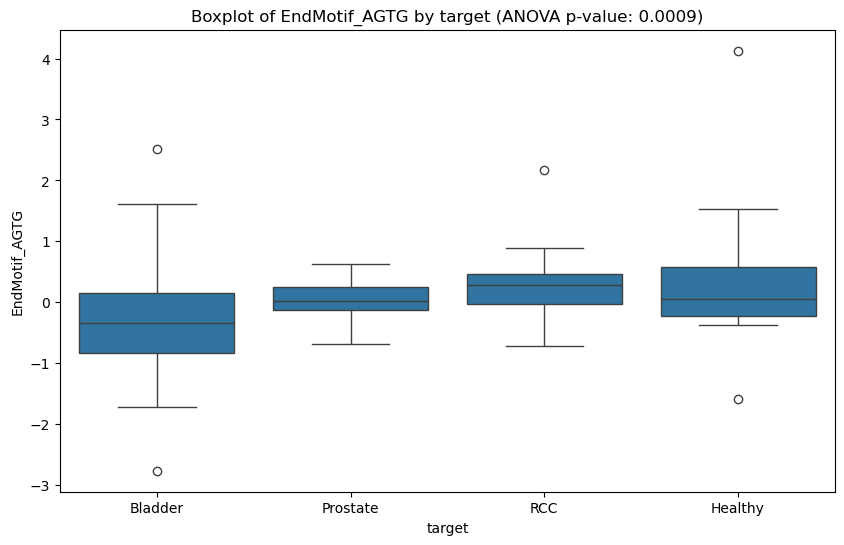

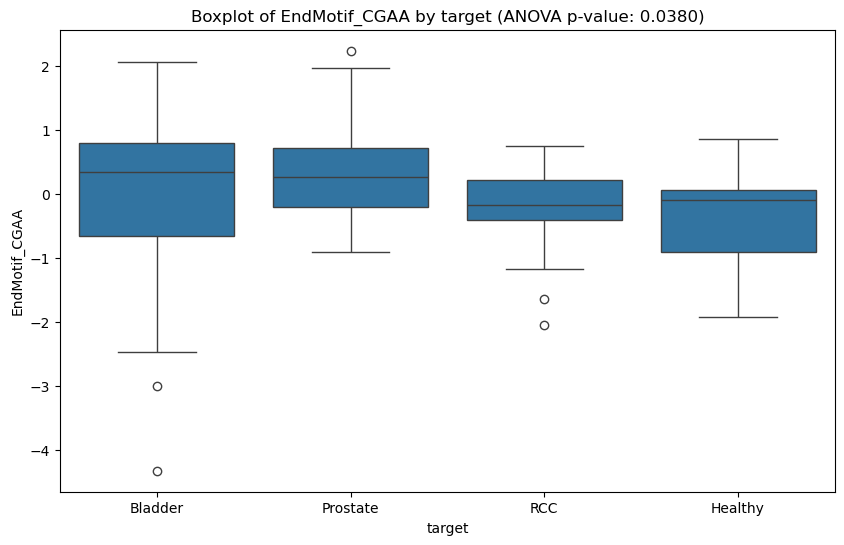

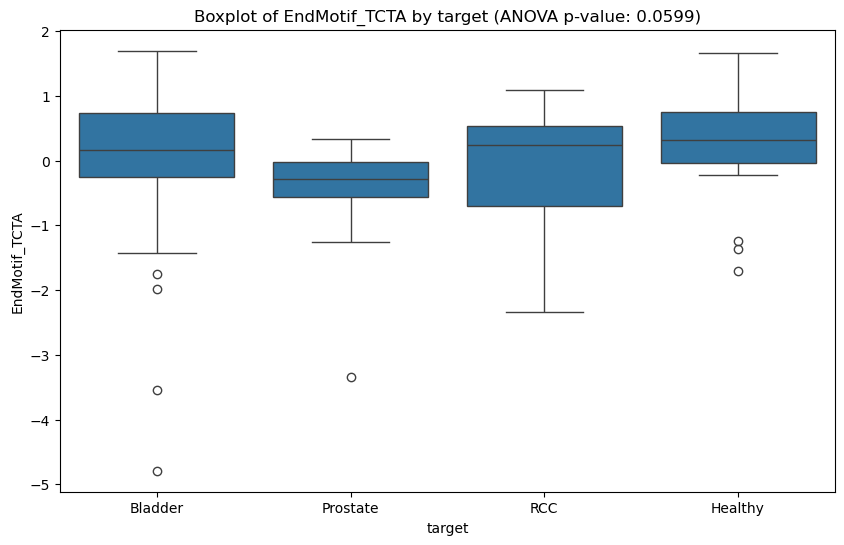

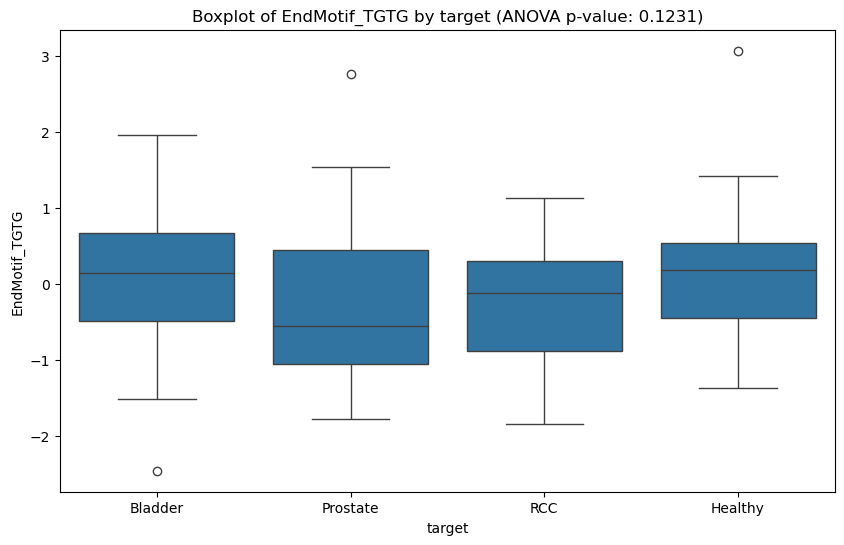

(1.959233723417156, 0.12307176882844385)

In [67]:

Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA')
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_CGAA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TCTA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])

In [70]:
EndMotif_Bio = save_plots_and_create_summary(train_df, EndMotif_feature_importance,  save_dir=Output_dir+'/EdMotif_traindf/')
display(EndMotif_Bio.head())

,Feature,F-statistic,p-value
0,EndMotif_AGTG,5.786209,0.000940
1,EndMotif_TCTA,2.529648,0.059871
2,EndMotif_AATA,7.261307,0.000149
3,EndMotif_AATT,5.638978,0.001133
4,EndMotif_CGAA,2.885281,0.038047
